# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Описание данных
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

## Ход выполнения проекта
1. Откройте файл с данными и изучите общую информацию (путь к файлу /datasets/real_estate_data.csv):
- Скачать датасет
- Загрузите данные из csv-файла в датафрейм c помощью библиотеки pandas.
- Изучите общую информацию о полученном датафрейме.
- Постройте гистограмму для всех числовых столбцов таблицы на одном графике. Например, для датафрейма data можно построить такую гистограмму командой data.hist(figsize=(15, 20)). Напомним, что параметр figsize задаёт размер графика.

2. Предобработка данных:
- Найдите и изучите пропущенные значения в столбцах:
- Определите, в каких столбцах есть пропуски.
- Заполните пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски можно заменить на число 0. Если логичную замену предложить невозможно, то оставьте пропуски. Пропущенные значения — тоже важный сигнал, который нужно учитывать.
- В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных.
- Рассмотрите типы данных в каждом столбце:
- Найдите столбцы, в которых нужно изменить тип данных.
- Преобразуйте тип данных в выбранных столбцах.
- В ячейке с типом markdown поясните, почему нужно изменить тип данных.
- Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.

3. Добавление в таблицу новых столбцов со следующими параметрами:
- цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

4. Исследовательский анализ данных:
- Изучите перечисленные ниже параметры объектов и постройте отдельные гистограммы для каждого из этих параметров. В некоторых параметрах встречаются редкие и выбивающиеся значения. При построении гистограмм удалите их. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах, если они есть. Если природа аномалии понятна и данные действительно искажены, то восстановите    корректное значение. В противном случае удалите редкие и выбивающиеся значения. Список параметров:
    - общая площадь;
    - жилая площадь;
    - площадь кухни;
    - цена объекта;
    - количество комнат;
    - высота потолков;
    - тип этажа квартиры («первый», «последний», «другой»);
    - общее количество этажей в доме;
    - расстояние до центра города в метрах;
    - расстояние до ближайшего парка.
- Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.
- Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
- Постройте гистограмму.
- Посчитайте среднее и медиану.
- В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?
- Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта.
- Изучите, зависит ли цена от:
    - общей площади;
    - жилой площади;
    - площади кухни;
    - количества комнат;
    - этажа, на котором расположена квартира (первый, последний, другой);
    - даты размещения (день недели, месяц, год).
- Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.
- Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра. Учитывайте каждый километр расстояния: узнайте среднюю цену квартир в одном километре от центра, в двух и так далее. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.

5. Напишите общий вывод: опишите полученные результаты и зафиксируйте итоговый вывод проведённого исследования.

## Получение файла с данными и изучение общей информации

In [1]:
# импорт необходимых библиотек
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [ ]:
# открываем файл с обработкой ошибок
try:
    data = pd.read_csv('')
except:
    data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Строк и столбцов: (23699, 22)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  o

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


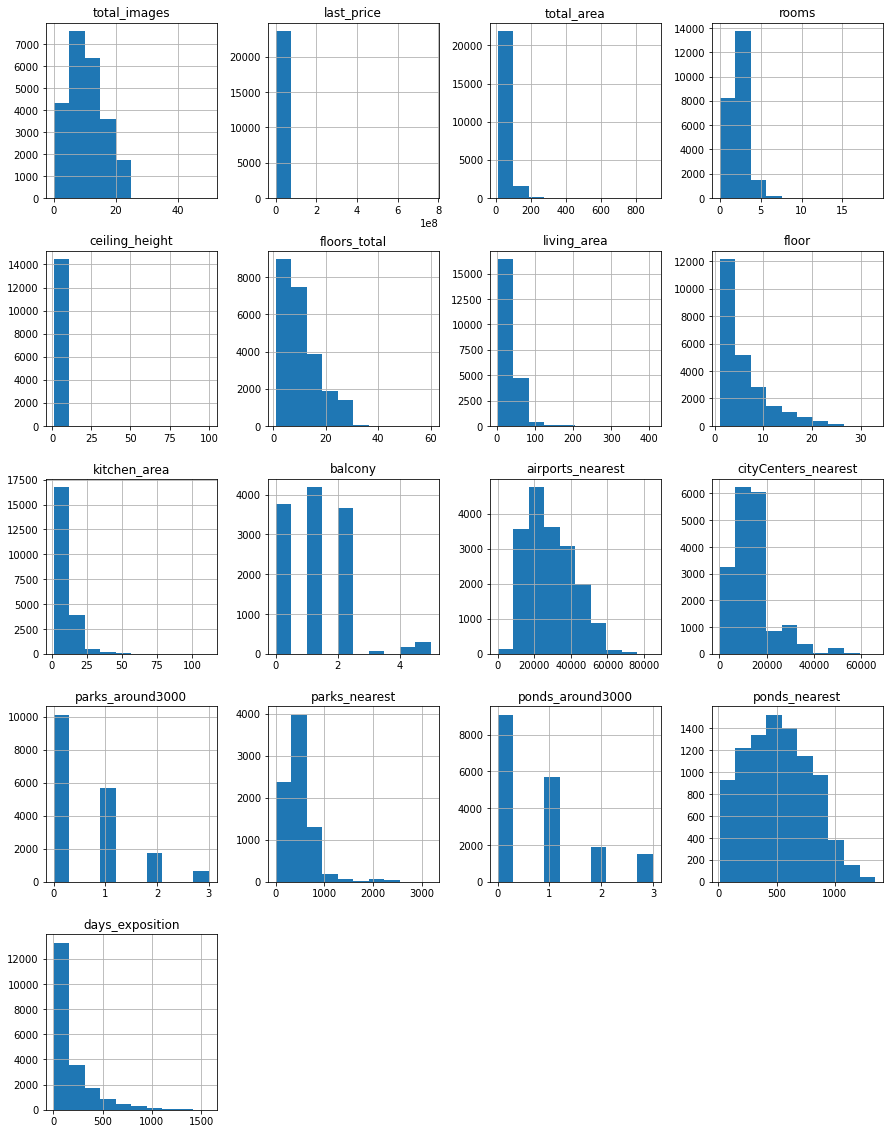

In [2]:
# смотрим инфу о датасете
print('Строк и столбцов:', data.shape) # смотрим информацию о размере датафрейма
print()
print(data.info()) # смотрим основную информацию о датафрейме
print()
print('Получаем min, max, среднее и т.п.:')
print(data.describe().T)
print()
print('Пропусков:')
print(data.isna().sum()) # количество пропусков в таблице
print()
pd.set_option('display.max_columns', None)
print('Явных дубликатов:', data.duplicated().sum()) # получаем количество явных дубликатов
data.hist(figsize=(15, 20)); # строим общие гистограммы
data.head(15) # смотрим первые 15 строк датафрейма

Выше загрузили необходимые библиотеки и данные из файла в датафрейм.<br>
Вывели на экран для изучения общую информацию о полученном датафрейме и первые строки данных.<br>
Определили количество пропусков данных, наличие дубликатов, максимальных, минимальных и непроавдоподобных значений.<br>
Также построили гистограмму для всех числовых столбцов.<br><br>
**Итоги изучения датафрейма**<br>
1) В полученной таблице **23 698 строк** и **22 столбца**: 3 столбца с целочисленными значениями типа _int_, 14 столбцов содержат числа с плавающей запятой типа _float_, 3 столбца типа _object_ и 2 столбца с логическими данными типа _bool_.<br><br>
2) В столбцах таблицы содержится следующая информация:<br>
**total_images** — количество фотографий квартиры в объявлении; <br>
**last_price** — цена на момент снятия с публикации; <br>
**total_area** — площадь квартиры в квадратных метрах;<br>
**first_day_exposition** — дата публикации; <br>
**rooms** — количество комнат; <br>
**ceiling_height** — высота потолков в метрах; <br>
**floors_total** — количество этажей в доме; <br>
**living_area** — жилая площадь квартиры в квадратных метрах;<br>
**floor** — этаж; <br>
**is_apartment** — апартаменты или нет; <br>
**studio** — квартира-студия или нет; <br>
**open_plan** — свободная планировка или нет; <br>
**kitchen_area** — площадь кухни в квадратных метрах;<br>
**balcony** — количество балконов; <br>
**locality_name** — название населённого пункта; <br>
**airports_nearest** — расстояние до ближайшего аэропорта в метрах; <br>
**cityCenters_nearest** — расстояние до центра города в метрах; <br>
**parks_around3000** — число парков в радиусе 3 км; <br>
**parks_nearest** — расстояние до ближайшего парка в метрах; <br>
**ponds_around3000** — число водоёмов в радиусе 3 км; <br>
**ponds_nearest** — расстояние до ближайшего водоёма в метрах; <br>
**days_exposition** — сколько дней было размещено объявление (от публикации до снятия).<br><br>
3) Явных дубликатов не найдено.<br><br>
4) Поменять типы данных в столбцах:<br>
**last_price**, **floors_total**, **balcony** и **days_exposition** на вещественное число _int64_, потому что эти данные в дробном виде не нужны;<br>
**is_apartment**, **parks_around3000**, **ponds_around3000**  на логическое _bool_, потому что либо есть пруд/водоём, либо его нет;<br>
**first_day_exposition** на тип _datetime64_, но выведем только дату, потому что данных о времени в таблице нет, да они и не нужны.<br><br>
5) Надо переименовать в соответствии со стилем _snake_case_ столбцы:<br>
**cityCenters_nearest** в **city_centers_nearest**,<br>
**parks_around3000** в **parks_around_3000**,<br>
**ponds_around3000** в **ponds_around_3000**.<br><br>
6) Разное количество значений в столбцах говорит о наличие в таблице пропусков. Это может быть человеческий фактор, когда пользователь не указал конкретную отсутствующую у него информацию, например, количество балконов или расстояние до аэропорта. Однако нельзя отрицать технические ошибки.<br><br>
7) Изучение максимальных и минимальных значений (гистрограммы подтверждают, что есть неправдоподобные данные, как например, максимальная высота потолка 100 метров или количество комнат равное нулю):<br>
- минимальная цена квартиры в параметре **last_price** 12 190 руб., что явно _противречит_ рынку Санкт_Петербурга и Ленинградской области и _похоже на ошибку человека_, как и максимальная — 763 000 000 руб., хотя для некоторых исторических и элитных объектов такая высокая цена _возможна_. Эти значения будут плохо влиять на среднее, поэтому их стоит _исключить_;<br>
- минимальное число комнат **rooms** равное нулю — _ошибка_, хотя так _может быть_ обозначена _квартира-студия_, будем проверять;<br>
- высота потолков **ceiling_height** минимальная — 1 метр, максимальная — 100 метров и это _явно ошибка_, починим;<br>
- максимальная этажность дома **floors_total** в 60 этажей _похожа на ошибку_, потому что _самое высокое_ здание в Санкт-Петербурге и области — Лахта Центр имеет _35 этажей_, поэтому такие объекты удалим;<br>
- жилая площадь **living_area** минимум в 2 кв. м _невозможна_ и это ошибка, надо удалить;<br>
- площадь кухни **kitchen_area** в 1,3 кв. м тоже _невозможна_, значит тоже ошибка — удалить;<br>
- расстояние до аэропорта **airports_nearest** в 0 м _невозможно_, там нет жилья, поэтому здесь либо из-за отсутствия информации заполнили нулём, либо это ошибка — удалить;<br>
- минимальное количество дней размещения объявления **days_exposition** равное 1 — это либо продажа за один день, либо снятие объявления по другой причине, а значит _допустимо_, но при большом количестве таких объявлений, эти данные могут _негативно влиять_ на среднее; максимальное значение здесь 1580 дней ил больше 4-х лет, что также может негативно влиять на среднее время.

## Предобработка данных

На этом этапе нужно:<br>
1) Переименовать столбцы.<br>
2) Найти и обработать пропущенные значения.<br>
3) Переопределить в указанных выше столбцах типы данных.<br>
4) Найти и изучить уникальные значения в столбце с названиями.<br>
5) Найти неявные дубликаты.<br>
6) Убрать недостоверные, редкие и выбивающиеся значения.

#### Переименуем столбцы

In [3]:
# Переименуем столбцы
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'}, inplace = True )
# Проверяем
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Ищем пропуски значений

In [4]:
# Находим пустые ячейки
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around_3000        5518
parks_around_3000        5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

В 14 столбцах из 22 пропущены значения. Больше всего пропусков в:<br>
**is_apartment** (20924 пропусков) — апартаменты или нет (булево значение), многие пользователи не знают, что такое аппартаменты, поэтому не заполняют, пустые ячейки заполним _False_.<br>
**parks_around_3000** (5518 пропусков) — булево значение, потому что или есть парк в радиусе 3 км, или нет; количество пропусков здесь совпадает с пропусками в ponds_around_3000, что подозрительно; <br>
**ponds_around_3000** (5518 пропусков) — булево значение, как выше; пропуски вызваны либо отсутствием парков/водоёмов в радиусе 3 км, либо тем, что не была получена информация на основе картографических данных; в любом случае эти столбцы на исследование не влияют, пропуски оставим или заполним _нулём_<br>
**parks_nearest** (15620 пропусков) — расстояние до ближайшего парка (м), больше половины объектов не имеют информации, скорее всего, из-за отсутствия картографических данных; пропуски в столбце не влияют, оставим.<br>
**ponds_nearest** (14589 пропусков) — расстояние до ближайшего водоёма (м), тоже самое, что с парками, оставим пропуски, хотя эти значения можно _частично взять_ из соответствующих данных **parks_around_3000** и **ponds_around_3000**, потому что указано, что в радиусе 3 км есть парк/водоём.<br>
**balcony** (11519 пропусков) — количество балконов пропущено, скорее всего, из-за _их отсутствия_, заполним _нулём_.<br>
**ceiling_height** (9195 пропусков) — почти 40% объявлений (_это много!_) без указания высоты потолков (м), что, вероятно, вызвано человечским фактором (пользователи просто не стали замерять высоту), заполним _медианным значением по населённому пункту_, как самым подходящим. <br>
Пропуски в: <br>
**airports_nearest** (5542 пропусков) и **city_centers_nearest** (5519 пропусков) — нет информации из картографических данных, заполним _медианным значением по населенному пункту_;<br>
**days_exposition** (3181 пропусков) — почти в 13% объявлений нет информации о количестве дней размещения, но данные должны приходить автоматом — это может быть технической ошибкой, но может быть _ещё открытыми_ объявлениями; всё равно эти данные важны для исследования, заполнить нечем, оставим пропуски.<br>
**kitchen_area** (2278 пропусков) и **living_area** (1903 пропуска) — пользователи не помнят точную площадь и вносят значения, можно заполнить _медианными значениями_ в соответствии с количеством комнат в квартире;<br>
**floors_total** (86 пропусков) и **locality_name** (49 пропусков) на анализ не влияют, поэтому _выбросим_, так как их количество _очень маленькое_ в сравнении со всем датасетом.

#### Ликвидируем пропуски и меняем типы данных

In [5]:
# Заполняем пропуски в столбце is_apartment
data['is_apartment'].fillna(False, inplace=True)
data[['is_apartment']] = data[['is_apartment']].astype('bool')
# Проверим
print('Тип данных:', data.is_apartment.dtype)
print('Количество уникальных значений:', data['is_apartment'].nunique())
print('Количество пропусков:', data['is_apartment'].isna().sum())

Тип данных: bool
Количество уникальных значений: 2
Количество пропусков: 0


In [6]:
# Заполняем пропуски в столбце balcony
data['balcony'].fillna(0, inplace=True)
data['balcony'] = data['balcony'].astype('int64')
# Проверим
print('Тип данных:', data.balcony.dtype)
print('Количество уникальных значений:', data['balcony'].nunique())
print('Количество пропусков:', data['balcony'].isna().sum())

Тип данных: int64
Количество уникальных значений: 6
Количество пропусков: 0


In [7]:
# Получим уникальные значения locality_name
print('Количество уникальных значений:', data['locality_name'].nunique())
data['locality_name'].sort_values().unique()

Количество уникальных значений: 364


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Здесь видим _много неявных дублей_, например 'поселок' и 'посёлок', ещё повторяются названия.

In [8]:
# Убираем дубликаты в locality_name функцией удаления типов населённых пунктов и замены регистра на нижний
def sort_locality_name(row):
    temp_elem = str(row[14]).split()
    final_result = []
    for elem in temp_elem:
        if elem not in ['посёлок', 'деревня', 'городского', 'типа', 'поселок', 'городской', 'садовое', 'товарищество',
                        'село', 'садоводческое', 'некоммерческое', 'товарищество', 'коттеджный']:
            final_result.append(elem)
    return " ".join(final_result).lower()
data['locality_name'] = data.apply(sort_locality_name, axis=1)  # применяем функцию

# Смотрим уникальные значения в алфавитном порядке и их количество
print('Количество населённых пунктов:', data['locality_name'].nunique())
print('Количество пропусков:', data['locality_name'].isna().sum())

# Удалим строки без населённого пункта, чтобы не мешали в анализе,
# потому что непонятно где эти объекты находятся,
# а их количество очень мало по сравнению со всем датасетом
data = data.loc[~((data['locality_name'].isna()))]
print()
set(data['locality_name'].unique())

Количество населённых пунктов: 309
Количество пропусков: 0



{'nan',
 'агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'большая вруда',
 'большая ижора',
 'большая пустомержа',
 'большие колпаны',
 'большое рейзино',
 'большой сабск',
 'бор',
 'борисова грива',
 'бугры',
 'будогощь',
 'ваганово',
 'важины',
 'вартемяги',
 'вахнова кара',
 'виллози',
 'вознесенье',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'вырица',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'гостилицы',
 'громово',
 'дзержинского',
 'дружная горка',
 'дружноселье',
 'дубровка',
 'елизаветино',
 'ефимовский',
 'жилгородок',
 'жилпосёлок',
 'житково',
 'заводской',
 'заклинье',
 'заневка',
 'запорожское',
 'зеленогорск',
 'зимитицы',
 'ивангород',
 'извара',
 'ильичёво',
 'имени морозова',
 'имен

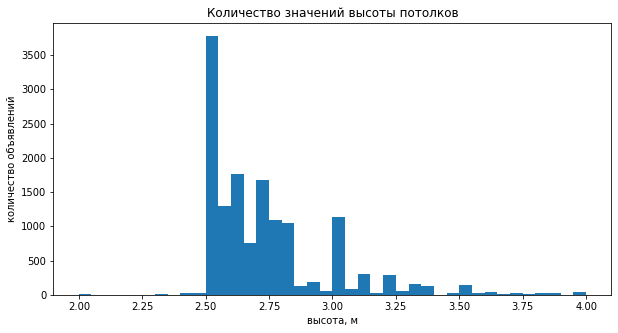

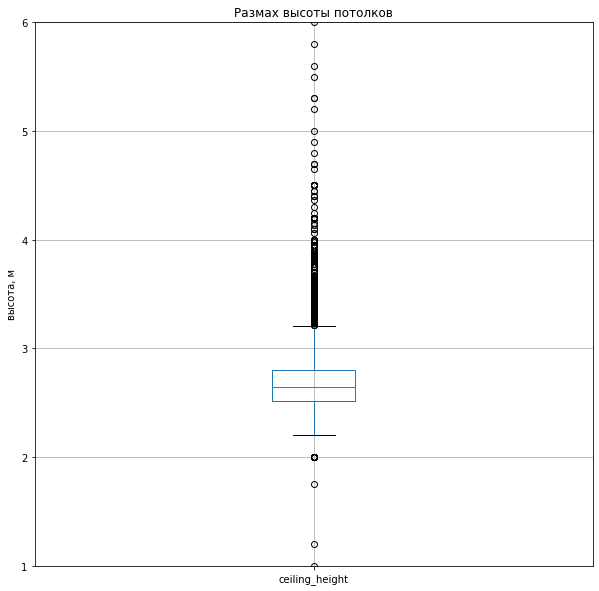

In [9]:
# Посмотрим разброс значений высоты потолков
data['ceiling_height'].describe().T
# Посмотрим график
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 40, range=(2, 4), figsize=(10, 5))
plt.title('Количество значений высоты потолков')
plt.xlabel('высота, м')
plt.ylabel('количество объявлений')
plt.show()
# Построим диаграмму размаха высоты потолков
data.boxplot(column='ceiling_height', figsize=(10, 10))
plt.title('Размах высоты потолков')
plt.ylim(1, 6)
plt.ylabel('высота, м')
plt.show()

Из графиков видно, что значения меньше 2,4 м и больше 3 метров - **выбросы**.

In [10]:
# Посмотрим уникальные значения высоты
set(data['ceiling_height'].unique())

{nan,
 1.0,
 1.2,
 1.75,
 2.0,
 2.2,
 2.25,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,


Здесь видим _ошибки и аномалии_ в значениях высоты потолков. Это не только **1 метр** и **100 м**, но **14** или **27 метров**, а также **1,2** или **2 метра**. Значения _вне диапазона 2,5-6,0 м_ считаю **ошибочными**: где-то человек не там запятую поставил, как с 20-метровыми потолками, где-то пользователь ошибся клавишей - вместо 2,2 набрал 1,2 или вместо 5,3 набрал 8,3. Надо исправлять, потому что недостоверные значения исказят результаты.

In [11]:
# Изменим значения больше 20, разделив их на 10
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10

# Убираем пропуски в ceiling_height
median_ceiling_height = data.groupby(['locality_name']).agg({'ceiling_height' : 'median'}) # расчёт медианы ceiling_height по населённому пункту и замена отсутствующих значений
for loc_name in median_ceiling_height.index: #цикл, который автоматически будет заменять отсутствующие значения в столбце ceiling_height соответсующими значениями столбца locality_name
    data.loc[data['locality_name'] == loc_name, 'ceiling_height']=data.loc[data['locality_name'] == loc_name, 'ceiling_height'].fillna(median_ceiling_height.loc[loc_name, 'ceiling_height'])

# Удаляем строки со значениями ceiling_height меньше 2,5 и больше 6 метров (это двухэтажные квартиры, например)
data = data.query('2.5 <= ceiling_height <= 6', engine='python')
    
# Проверим
print('Количество уникальных значений:', data['ceiling_height'].nunique())
print('Количество пропусков:', data['ceiling_height'].isna().sum())
set(data['ceiling_height'].unique())

Количество уникальных значений: 166
Количество пропусков: 0


{2.5,
 2.51,
 2.52,
 2.525,
 2.53,
 2.54,
 2.55,
 2.5599999999999996,
 2.56,
 2.57,
 2.575,
 2.58,
 2.59,
 2.5999999999999996,
 2.6,
 2.61,
 2.615,
 2.62,
 2.625,
 2.63,
 2.64,
 2.65,
 2.6500000000000004,
 2.66,
 2.67,
 2.675,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.725,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.875,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,

In [12]:
# Заполняем пустые ячейки с парками/водоёмами ближе 3 км и меняем тип данных
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)
data['parks_around_3000'] = data['parks_around_3000'].astype('bool')
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)
data['ponds_around_3000'] = data['ponds_around_3000'].astype('bool')
# Проверим
print('Тип данных:', data.parks_around_3000.dtype)
print('Количество уникальных значений в parks_around_3000:', data['parks_around_3000'].nunique())
print('Количество пропусков:', data['parks_around_3000'].isna().sum())
print()
print('Тип данных:', data.ponds_around_3000.dtype)
print('Количество уникальных значений в ponds_around_3000:', data['ponds_around_3000'].nunique())
print('Количество пропусков:', data['ponds_around_3000'].isna().sum())
print()

# Заполним пустные ячейки расстояния до парка/водоёма в соответствии со смежными данными
data['parks_nearest'] = data.loc[data['parks_around_3000'] > 0, 'parks_nearest'].fillna(value=3000)
data['ponds_nearest'] = data.loc[data['ponds_around_3000'] > 0, 'ponds_nearest'].fillna(value=3000)
# Проверим
print('Количество уникальных значений в parks_nearest:', data['parks_nearest'].nunique())
print('Количество пропусков:', data['parks_nearest'].isna().sum())
print()
print('Количество уникальных значений в ponds_nearest:', data['ponds_nearest'].nunique())
print('Количество пропусков:', data['ponds_nearest'].isna().sum())
print()

# В столбце floors_total оставим значения с этажами ниже 30
data = data.query('floors_total < 30 or floors_total.isna()', engine='python')
# Пропуски в floors_total можно отбросить, потому что их количество ничтожно относительно датасета
data = data.loc[~((data['floors_total'].isna()))]
data['floors_total'] = data['floors_total'].astype('int64')
# Проверим
print('Тип данных:', data.floors_total.dtype)
print('Количество уникальных значений в floors_total:', data['floors_total'].nunique())
print('Количество пропусков:', data['floors_total'].isna().sum())

Тип данных: bool
Количество уникальных значений в parks_around_3000: 2
Количество пропусков: 0

Тип данных: bool
Количество уникальных значений в ponds_around_3000: 2
Количество пропусков: 0

Количество уникальных значений в parks_nearest: 992
Количество пропусков: 15477

Количество уникальных значений в ponds_nearest: 1096
Количество пропусков: 14439

Тип данных: int64
Количество уникальных значений в floors_total: 29
Количество пропусков: 0


In [13]:
# Проверяем пропуски в airports_nearest и изучим аномалии
print('Количество уникальных значений в airports_nearest:', data['airports_nearest'].nunique())
print('Количество пропусков в airports_nearest:', data['airports_nearest'].isna().sum())
print(data.airports_nearest.describe())

Количество уникальных значений в airports_nearest: 8248
Количество пропусков в airports_nearest: 5410
count    17994.00000
mean     28805.49761
std      12626.50385
min          0.00000
25%      18559.00000
50%      26763.50000
75%      37274.50000
max      84869.00000
Name: airports_nearest, dtype: float64


Пропущенных значений по столбцу **airports_nearest** — расстояние до ближайшего аэропорта — насчитывается 5542, что _очень много_, однако для заполнения пропусков медианное и среднее значения **не подойдут**.<br>
Эти данные приходят **автоматически** из картографического сервиса, поэтому, скорее всего, пропуски говорят об _отсутствии_ аэропорта в данной местности, либо о том, что он _дальше максимального значения_ для данного столбца.<br>
Однако данные значения **не являются значимыми** при определении цен на недвижимость. Следовательно, лучше _оставить_ все пропуски без изменений.<br>
Но _можно_ попробовать взять **среднее значение по населённому пункту**.

In [14]:
# Убираем пропуски в airports_nearest
mean_airports_nearest = data.groupby(['locality_name']).agg({'airports_nearest' : 'mean'}) # расчёт среднего по населённому пункту и замена отсутствующих значений
for loc_name in mean_airports_nearest.index: #цикл, который автоматически будет заменить отсутствующие значения в столбце airports_nearest соответсующими значениями столбца locality_name
    data.loc[data['locality_name'] == loc_name, 'airports_nearest']=data.loc[data['locality_name'] == loc_name, 'airports_nearest'].fillna(mean_airports_nearest.loc[loc_name, 'airports_nearest'])
# Проверим
print('Количество пропусков:', data['airports_nearest'].isna().sum())

Количество пропусков: 5310


Убрали 100 пропусков, значит имеющихся данных не хватает, оставим остальные пропуски без изменений.

In [15]:
# Прверяем пропуски в city_centers_nearest и изучим аномалии
print('Количество уникальных значений в airports_nearest:', data['airports_nearest'].nunique())
print('Количество пропусков в city_centers_nearest:', data['city_centers_nearest'].isna().sum())
print(data.city_centers_nearest.describe())

Количество уникальных значений в airports_nearest: 8255
Количество пропусков в city_centers_nearest: 5387
count    18017.000000
mean     14165.883832
std       8611.579469
min        181.000000
25%       9210.000000
50%      13073.000000
75%      16268.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


In [16]:
# Убираем пропуски в city_centers_nearest
mean_city_centers_nearest = data.groupby(['locality_name']).agg({'city_centers_nearest' : 'mean'}) # расчёт среднего по населённому пункту и замена отсутствующих значений
for loc_name in mean_city_centers_nearest.index: #цикл, который автоматически будет заменить отсутствующие значения в столбце city_centers_nearest соответсующими значениями столбца locality_name
    data.loc[data['locality_name'] == loc_name, 'city_centers_nearest']=data.loc[data['locality_name'] == loc_name, 'city_centers_nearest'].fillna(mean_city_centers_nearest.loc[loc_name, 'city_centers_nearest'])
# Проверим
print('Количество пропусков:', data['airports_nearest'].isna().sum())

Количество пропусков: 5310


**Совпадение** значений и пропусков в `city_centers_nearest` с `airports_nearest` говорит, что это _технической сбой_, потому что эти данные беруться **автоматически** из картографического сервиса.<br>
Однако, пропуски в столбцах с картографическими данными трогать не будем, так как мы не можем восстановить их с достаточной точностью.

In [17]:
# Заменяем пустые значения жилой площади в соответствии с количеством комнат в квартире
liv_area = data.groupby('rooms')['living_area'].median()
for i in data['rooms'].unique():
    data.loc[((data['living_area'].isna()) & (data['rooms'] == i)), 'living_area'] = liv_area[i]
# Проверим
print('Количество уникальных значений в living_area:', data['living_area'].nunique())
print('Количество пропусков:', data['living_area'].isna().sum())

Количество уникальных значений в living_area: 1771
Количество пропусков: 0


In [18]:
# Заменяем пустые значения площади кухни в соответствии с количеством комнат в квартире,
# потому что они как правило совпадают в типовых домах
kitch_area = data.groupby('rooms')['kitchen_area'].median()
for i in data['rooms'].unique():
    data.loc[((data['kitchen_area'].isna()) & (data['rooms'] == i)), 'kitchen_area'] = kitch_area[i]
data = data.loc[~(data['kitchen_area'].isna())]
# Проверим
print('Количество уникальных значений в kitchen_area:', data['kitchen_area'].nunique())
print('Количество пропусков:', data['kitchen_area'].isna().sum())

Количество уникальных значений в kitchen_area: 966
Количество пропусков: 0


In [19]:
# Проверим first_day_exposition на пропуски
print('Количество уникальных значений в first_day_exposition:', data['first_day_exposition'].nunique())
print('Количество пропусков:', data['first_day_exposition'].isna().sum())
# Преобразуем first_day_exposition в формат даты
data[['first_day_exposition']] = pd.to_datetime(data['first_day_exposition'])
print(data['first_day_exposition'].head(10))

Количество уникальных значений в first_day_exposition: 1488
Количество пропусков: 0
0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
5   2018-09-10
6   2017-11-02
7   2019-04-18
8   2018-05-23
9   2017-02-26
Name: first_day_exposition, dtype: datetime64[ns]


Далее определим тип данных и количество пропусков в **days_exposition**, этот параметр может быть важен для анализа цен. Ликвидируем _пропуски_ и преобразуем _тип данных_.

In [20]:
# Заменим пропуски нулями и приведём к вещественному типу данных
#data['days_exposition'].fillna(0, inplace=True)
#data['days_exposition'] = data['days_exposition'].astype(int)

# Проверим days_exposition на пропуски
print('Количество уникальных значений в days_exposition:', data['days_exposition'].nunique())
print('Количество пропусков:', data['days_exposition'].isna().sum())
print(data['days_exposition'].head(10))

Количество уникальных значений в days_exposition: 1139
Количество пропусков: 3117
0      NaN
1     81.0
2    558.0
3    424.0
4    121.0
5     55.0
6    155.0
7      NaN
8    189.0
9    289.0
Name: days_exposition, dtype: float64


Данные в **first_day_exposition** приведены к типу дата-время, _лишнее убрано_. Можно было бы попопробовать _заполнить_ пропуски в длительности объявлений взяв за основу **сегодняшнюю дату**, но мы не знаем, по какой причине там пропущены данные - может объявление не было размещено, потому что не закончено, может был технических сбой. Нужно определить количество пропусков и их влияние на результат.

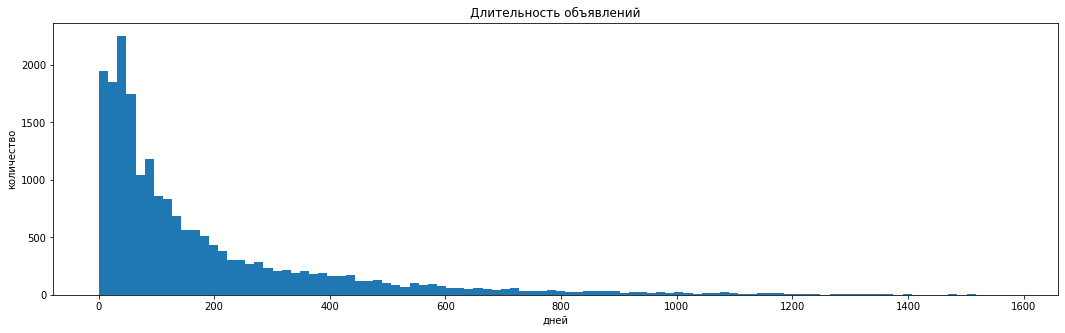

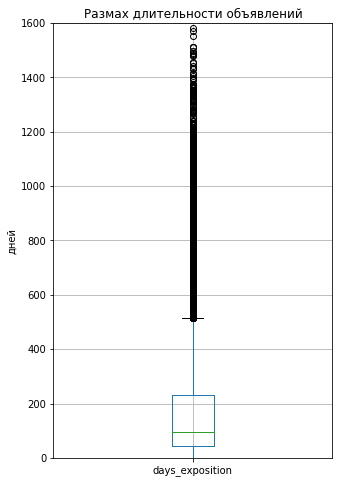

In [21]:
# Посмотрим график для наглядности
data['days_exposition'].sort_values().plot(y = 'days_exposition', kind = 'hist', bins = 100, figsize=(18, 5) )
plt.title('Длительность объявлений')
plt.ylabel('количество')
plt.xlabel('дней')
plt.show()
# Построим диаграмму размаха
data.boxplot(column='days_exposition', figsize=(5, 8))
plt.title('Размах длительности объявлений')
plt.ylim(0, 1600)
plt.ylabel('дней')
plt.show()

Видно, что _большая часть_ объявлений закрывается в течение **200 дней**, _некоторые_ висят больше года - до **пролутора лет**. Такое **возможно**, потому что владельцы квартир могут поставить _непривлекательные условия_, что влияет на решение покупателей.

In [22]:
# Преобразуем типы других данных в вещественные
data['last_price'] = data['last_price'].round().astype('int')
data['floor'] = data['floor'].round().astype('int')
#data['days_exposition'] = data['days_exposition'].round().astype('int')

# Смотрим результат
print(data.dtypes)

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000                 bool
parks_nearest                  float64
ponds_around_3000                 bool
ponds_nearest                  float64
days_exposition                float64
dtype: object


In [23]:
print('Строк и столбцов:', data.shape) # смотрим информацию о размере датафрейма
print()
# Смотрим основную информацию о датафрейме
print(data.info())
print()
# Проверяем количество пропусков
print('Пропусков:')
print(data.isna().sum())

Строк и столбцов: (23214, 22)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23214 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23214 non-null  int64         
 1   last_price            23214 non-null  int64         
 2   total_area            23214 non-null  float64       
 3   first_day_exposition  23214 non-null  datetime64[ns]
 4   rooms                 23214 non-null  int64         
 5   ceiling_height        23214 non-null  float64       
 6   floors_total          23214 non-null  int64         
 7   living_area           23214 non-null  float64       
 8   floor                 23214 non-null  int64         
 9   is_apartment          23214 non-null  bool          
 10  studio                23214 non-null  bool          
 11  open_plan             23214 non-null  bool          
 12  kitchen_area          23214 non-null  float

Мы **ликвидировали критические** пропуски. При этом из _23 699 строк_ у нас осталось _23 214 строк_, то есть мы потеряли **2%** информации. Это **не повлияет** на результаты исследования. Вместе с тем, _существенная_ часть данных, которая может влиять на итоги, была **потеряна при выгрузке** таблицы либо **не была внесена изначально**. Об этом надо _сообщить заказчику_ и ответственным за сбор данных.

#### Итоги предобработки данных
- Имена столбцов приведены к единому стилю.<br>
- Были изменены типы данных.<br>
- Обработаны явные и неявные дубликаты.<br>
- Обработаны пропуски в значимых столбцах.<br>

## Добавление в таблицу новых столбцов

В таблицу нужно добавить новые столбцы со следующими параметрами:<br>
- **price_one_meter** — цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);<br>
- **expo_weekday** — день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);<br>
- **expo_month** — месяц публикации объявления;<br>
- **expo_year** — год публикации объявления;<br>
- **floor_type** — тип этажа квартиры (значения — «первый», «последний», «другой»);<br>
- **city_centers_km** — расстояние до центра города в километрах (перевести из метров в км и округлить до ближайших целых значений).

In [24]:
# Добавим столбец с ценой за 1 кв.м
data['price_one_meter'] = data['last_price'] / data['total_area']
# Округляем полученное значение до копеек
data['price_one_meter'] = data['price_one_meter'].round(2)
# Посчитаем максимальную цену за метр
print('Максимальная цена за квадратный метр:', data.price_one_meter.max().round(2))
# Средняя цена
print('Средняя цена за квадратный метр:', data.price_one_meter.mean().round(2))
# Медианное значение за квадратный метр
print('Медиана цены за квадратный метр:', data.price_one_meter.median().round(2))
# Минимальная цена
print('Минимальная цена за квадратный метр:', data.price_one_meter.min().round(2))
print()
# Проверяем
data.sample(7)

Максимальная цена за квадратный метр: 1907500.0
Средняя цена за квадратный метр: 99622.65
Медиана цены за квадратный метр: 95000.0
Минимальная цена за квадратный метр: 111.83



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_meter
18994,12,7000000,70.0,2018-10-05,3,2.70,12,43.0,12,False,False,False,11.0,0,санкт-петербург,33002.0,13174.0,True,177.0,True,369.0,202.0,100000.00
1960,12,4380000,41.0,2017-09-27,1,2.70,10,18.5,7,False,False,False,10.8,2,санкт-петербург,13858.0,15902.0,True,680.0,False,NaN,12.0,106829.27
13171,4,14998000,118.0,2017-08-27,3,2.70,23,50.0,3,False,False,False,17.0,2,санкт-петербург,40841.0,12544.0,True,51.0,False,NaN,149.0,127101.69
2749,8,6200000,63.1,2015-10-29,3,2.70,6,38.7,6,False,False,False,9.8,0,санкт-петербург,23809.0,4377.0,True,361.0,False,NaN,836.0,98256.74
11396,1,5600000,61.8,2018-07-08,3,2.50,9,41.9,2,False,False,False,8.1,0,санкт-петербург,50200.0,15771.0,False,NaN,False,NaN,4.0,90614.89
2476,5,13000000,89.9,2017-08-07,2,2.72,9,59.6,5,False,False,False,15.1,0,санкт-петербург,20086.0,3816.0,True,433.0,True,401.0,140.0,144605.12
19112,20,8299000,83.0,2019-03-07,3,2.70,9,50.0,3,False,False,False,9.0,0,санкт-петербург,43803.0,10584.0,True,519.0,False,NaN,37.0,99987.95


In [25]:
# Добавим столбец с днём недели публикации объявления
data['expo_weekday'] = data['first_day_exposition'].dt.weekday
# Добавим столбец с месяцем публикации
data['expo_month'] = data['first_day_exposition'].dt.month
# Добавим столбец с годом публикации
data['expo_year'] = data['first_day_exposition'].dt.year
# Посмотрим годы, когда было максимальное предложение на рынке
print('Максимальное предложение в году:')
print(data['expo_year'].value_counts())
# Проверяем
data.tail()

Максимальное предложение в году:
2018    8330
2017    8007
2019    2825
2016    2740
2015    1175
2014     137
Name: expo_year, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_meter,expo_weekday,expo_month,expo_year
23693,9,4600000,62.40,2016-08-05,3,2.6,9,40.0,8,False,False,False,8.00,0,петергоф,45602.0,34104.0,True,352.0,True,675.0,239.0,73717.95,4,8,2016
23694,9,9700000,133.81,2017-03-21,3,3.7,5,73.3,3,False,False,False,13.83,0,санкт-петербург,24665.0,4232.0,True,796.0,True,381.0,NaN,72490.85,1,3,2017
23695,14,3100000,59.00,2018-01-15,3,2.5,5,38.0,4,False,False,False,8.50,0,тосно,NaN,NaN,False,NaN,False,NaN,45.0,52542.37,0,1,2018
23697,13,11475000,76.75,2017-03-28,2,3.0,17,30.5,12,False,False,False,23.30,2,санкт-петербург,39140.0,10364.0,True,173.0,True,196.0,602.0,149511.40,1,3,2017
23698,4,1350000,32.30,2017-07-21,1,2.5,5,12.3,1,False,False,False,9.00,0,новый учхоз,NaN,NaN,False,NaN,False,NaN,NaN,41795.67,4,7,2017


In [26]:
# Функция категоризации этажности в доме
def get_floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
# Добавим столбец с типом этажа квартиры
data['floor_type'] = data.apply(get_floor_type, axis=1)
print('Распределение предложений по этажам:')
print(data['floor_type'].value_counts())
# Проверяем
data.sample(10)

Распределение предложений по этажам:
другой       17086
последний     3278
первый        2850
Name: floor_type, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_meter,expo_weekday,expo_month,expo_year,floor_type
18124,12,2640000,35.52,2018-06-21,1,2.75,15,15.20,10,False,False,False,10.01,2,кудрово,NaN,NaN,False,NaN,False,NaN,19.0,74324.32,3,6,2018,другой
19065,3,15500000,112.00,2016-05-12,4,2.70,24,60.33,15,False,False,False,17.55,0,санкт-петербург,33665.0,14764.0,False,NaN,False,NaN,74.0,138392.86,3,5,2016,другой
6148,0,2000000,51.30,2018-03-26,2,2.50,2,30.20,1,False,False,False,7.60,0,мга,NaN,NaN,False,NaN,False,NaN,91.0,38986.35,0,3,2018,первый
8958,9,3564000,53.00,2018-10-17,2,2.65,12,28.00,11,False,False,False,12.00,0,янино-1,NaN,NaN,False,NaN,False,NaN,45.0,67245.28,2,10,2018,другой
6124,7,2400000,40.00,2016-06-07,1,2.55,5,15.58,4,False,False,False,9.30,0,рощино,NaN,NaN,False,NaN,False,NaN,34.0,60000.00,1,6,2016,другой
2262,13,2600000,72.00,2018-02-02,3,3.20,2,53.00,1,False,False,False,8.00,0,ропша,NaN,NaN,False,NaN,False,NaN,124.0,36111.11,4,2,2018,первый
3984,18,3850000,35.50,2017-06-21,1,2.70,22,17.60,1,False,False,False,9.00,2,санкт-петербург,26078.0,10251.0,True,387.0,False,NaN,152.0,108450.70,2,6,2017,первый
7923,7,3400000,57.00,2015-03-23,2,2.80,3,36.00,1,False,False,False,10.00,0,санкт-петербург,27908.0,6755.0,False,NaN,True,354.0,484.0,59649.12,0,3,2015,первый
21486,20,6800000,60.00,2018-10-02,2,2.50,3,34.00,3,False,False,False,9.10,0,санкт-петербург,21485.0,1384.0,True,347.0,True,82.0,120.0,113333.33,1,10,2018,последний
20275,12,3400000,30.90,2017-07-20,1,2.70,9,15.50,3,False,False,False,8.10,0,санкт-петербург,40642.0,11574.0,True,278.0,False,NaN,236.0,110032.36,3,7,2017,другой


In [27]:
# Добавим столбец city_centers_km с расстоянием до центра города в километрах
data['city_centers_km'] = round(data['city_centers_nearest'] / 1000)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_meter,expo_weekday,expo_month,expo_year,floor_type,city_centers_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,санкт-петербург,18863.0,16028.0,True,482.0,True,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.63,11,18.60,1,False,False,False,11.00,2,шушары,12817.0,18603.0,False,NaN,False,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.30,4,False,False,False,8.30,0,санкт-петербург,21741.0,13933.0,True,90.0,True,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.00,2015-07-24,3,2.70,14,45.00,9,False,False,False,9.50,0,санкт-петербург,28098.0,6800.0,True,84.0,True,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,санкт-петербург,31856.0,8098.0,True,112.0,True,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,янино-1,NaN,NaN,False,NaN,False,NaN,55.0,95065.79,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.64,26,10.60,6,False,False,False,14.40,1,парголово,52996.0,19143.0,False,NaN,False,NaN,155.0,99195.71,3,11,2017,другой,19.0
7,5,7915000,71.60,2019-04-18,2,2.70,24,30.50,22,False,False,False,18.90,2,санкт-петербург,23982.0,11634.0,False,NaN,False,NaN,NaN,110544.69,3,4,2019,другой,12.0
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,False,False,False,8.81,0,мурино,NaN,NaN,False,NaN,False,NaN,189.0,87454.76,2,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,санкт-петербург,50898.0,15008.0,False,NaN,False,NaN,289.0,88524.59,6,2,2017,другой,15.0


## Исследовательский анализ данных

#### Стоимость объектов

In [28]:
# Посмторим описание столбца last_price
data['last_price'].describe().T

count    2.321400e+04
mean     6.595613e+06
std      1.097446e+07
min      1.219000e+04
25%      3.480000e+06
50%      4.680000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [29]:
# Приведём значения в нормальный вид
data_rub = (data['last_price'].astype (float)/1000000).astype(str) + ' млн руб.'
# Проверим
data_rub.head()

0     13.0 млн руб.
1     3.35 млн руб.
2    5.196 млн руб.
3     64.9 млн руб.
4     10.0 млн руб.
Name: last_price, dtype: object

In [30]:
# Посмотрим статистику значениий
data_rub.describe().T

count            23214
unique            2922
top       4.5 млн руб.
freq               341
Name: last_price, dtype: object

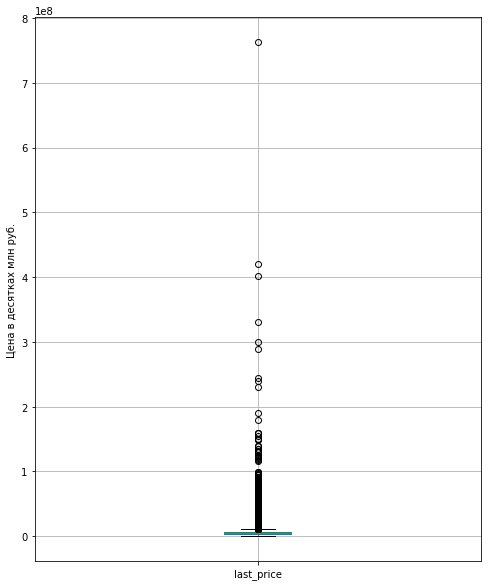

In [31]:
# Построим диаграмму размаха
data.boxplot(column=['last_price'], figsize=(8,10), grid=True)
plt.ylabel('Цена в десятках млн руб.')
plt.show()

In [32]:
# Посмотрим на максимальные и минимальные значения цены
print('Максимальная цена:', data['last_price'].max(), 'рублей')
print('Минимальная цена:', data['last_price'].min(), 'рублей')

Максимальная цена: 763000000 рублей
Минимальная цена: 12190 рублей


Интересные цифры: почти миллиард - **763 млн руб.** (скорее всего особняк или усадьба), и меньше трёх 5-тысячных купюр - **12 190 руб.** - за 100-метровую двухкомнатную квартиру. Нужно проверить, сколько таких значений в таблице.

In [33]:
# Вызовем 10 маинимальных значений цены
data.nsmallest(10, ['last_price'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_meter,expo_weekday,expo_month,expo_year,floor_type,city_centers_km
8793,7,12190,109.0,2019-03-20,2,2.750,25,32.0,25,False,False,False,40.5,0,санкт-петербург,36421.0,9176.0,True,805.0,False,NaN,8.0,111.83,2,3,2019,последний,9.0
17456,7,430000,30.4,2019-04-22,1,2.500,2,16.0,1,False,False,False,6.0,0,сланцы,NaN,NaN,False,NaN,False,NaN,NaN,14144.74,0,4,2019,первый,NaN
5698,7,450000,42.0,2017-07-31,2,2.615,1,23.0,1,False,False,False,5.8,0,будогощь,NaN,NaN,False,NaN,False,NaN,233.0,10714.29,0,7,2017,первый,NaN
16219,14,450000,38.5,2018-07-11,2,2.650,2,30.5,1,False,False,False,8.8,0,вахнова кара,NaN,NaN,False,NaN,False,NaN,45.0,11688.31,2,7,2018,первый,NaN
21912,0,470000,37.0,2018-02-18,1,2.600,3,17.6,3,False,False,False,9.1,0,совхозный,NaN,NaN,False,NaN,False,NaN,45.0,12702.70,6,2,2018,последний,NaN
23484,11,470000,44.5,2018-07-02,2,2.500,2,28.0,2,False,False,False,7.5,0,сланцы,NaN,NaN,False,NaN,False,NaN,298.0,10561.80,0,7,2018,последний,NaN
16032,8,480000,32.0,2019-01-06,1,2.500,2,16.0,1,False,False,False,9.1,0,сланцы,NaN,NaN,False,NaN,False,NaN,83.0,15000.00,6,1,2019,первый,NaN
10782,3,490000,29.1,2016-05-05,1,2.500,5,17.0,5,False,False,False,5.5,0,сланцы,NaN,NaN,False,NaN,False,NaN,719.0,16838.49,3,5,2016,последний,NaN
4405,9,500000,52.0,2018-08-02,2,2.700,2,31.0,1,False,False,False,8.0,0,сланцы,NaN,NaN,False,NaN,False,NaN,110.0,9615.38,3,8,2018,первый,NaN
14295,4,500000,34.0,2016-02-09,1,2.500,5,17.0,4,False,False,False,8.0,1,никольский,NaN,NaN,False,NaN,False,NaN,724.0,14705.88,1,2,2016,другой,NaN


_Аномалия_ среди минимальных значений всего **одна** и мы её уберём.

In [34]:
# Вызовем 10 максимальных значений цены
data.nlargest(10, ['last_price'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_meter,expo_weekday,expo_month,expo_year,floor_type,city_centers_km
12971,19,763000000,400.0,2017-09-30,7,2.70,10,250.0,10,False,False,False,20.0,2,санкт-петербург,25108.0,3956.0,True,530.0,True,756.0,33.0,1907500.00,5,9,2017,последний,4.0
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,False,False,112.0,0,санкт-петербург,30706.0,7877.0,False,NaN,True,318.0,106.0,466666.67,2,12,2017,последний,8.0
14706,15,401300000,401.0,2016-02-20,5,2.70,9,204.0,9,False,False,False,24.0,3,санкт-петербург,21912.0,2389.0,True,545.0,True,478.0,393.0,1000748.13,5,2,2016,последний,2.0
1436,19,330000000,190.0,2018-04-04,3,3.50,7,95.0,5,False,False,False,40.0,0,санкт-петербург,23011.0,1197.0,True,519.0,True,285.0,233.0,1736842.11,2,4,2018,другой,1.0
15651,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,False,False,False,70.0,0,санкт-петербург,32440.0,5297.0,False,NaN,True,198.0,111.0,485436.89,0,12,2017,другой,5.0
22831,18,289238400,187.5,2019-03-19,2,3.37,6,63.7,6,False,False,False,30.2,0,санкт-петербург,22494.0,1073.0,True,386.0,True,188.0,NaN,1542604.80,1,3,2019,последний,1.0
16461,17,245000000,285.7,2017-04-10,6,3.35,7,182.8,4,False,False,False,29.8,0,санкт-петербург,33143.0,6235.0,True,400.0,True,140.0,249.0,857542.88,0,4,2017,другой,6.0
13749,7,240000000,410.0,2017-04-01,6,3.40,7,218.0,7,False,False,False,40.0,0,санкт-петербург,32440.0,5297.0,False,NaN,True,198.0,199.0,585365.85,5,4,2017,последний,5.0
5893,3,230000000,500.0,2017-05-31,6,2.70,7,124.4,7,False,False,False,40.0,0,санкт-петербург,32440.0,5297.0,False,NaN,True,198.0,50.0,460000.00,2,5,2017,последний,5.0
8900,13,190870000,268.0,2016-03-25,3,2.70,8,132.0,7,False,False,False,40.0,0,санкт-петербург,32440.0,5297.0,False,NaN,True,198.0,901.0,712201.49,4,3,2016,другой,5.0


_Максимальные_ значения ограничим уровнем **15 млн руб.**

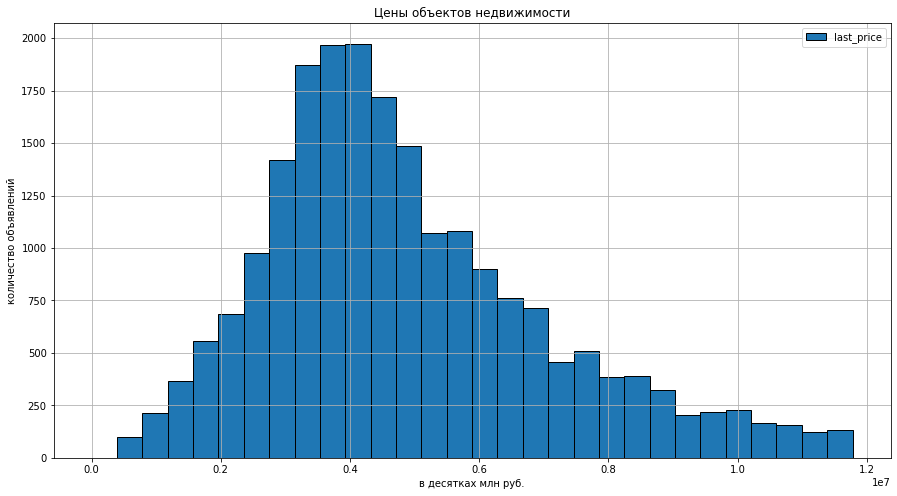

In [35]:
# Рассчитаем квартили чтобы построить график без выбросов
q1 = data['last_price'].quantile(.25) # Q1
q3 = data['last_price'].quantile(.75) # Q3
iqr = q3 - q1 # межквартильный размах

# Построим гистограмму цены
data['last_price'].hist(bins=30, range=(0, (q3 + 1.5 * iqr)), figsize=(15, 8), ec='black', legend=True)
plt.title('Цены объектов недвижимости')
plt.xlabel('в десятках млн руб.')
plt.ylabel('количество объявлений')
plt.show()

_Большая часть_ квартир продаётся по цене **3-5 млн рублей**. Объявлений _дешевле_ **2 млн руб.** и _дороже_ **7 млн руб.** - мало.

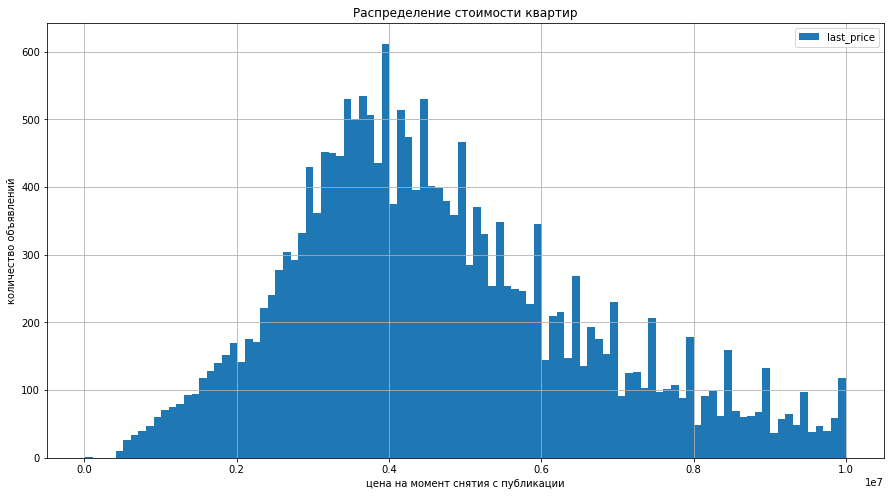

In [36]:
# Ограничим значения 10 миллионами
data_price = data.query('last_price <= 10000000')
data_price.plot(kind='hist', y='last_price', bins=100, title='Распределение стоимости квартир', grid=True, figsize=(15, 8))
plt.ylabel('количество объявлений')
plt.xlabel('цена на момент снятия с публикации')
plt.show()

Рассматриваем диапазон примерно **до 10 млн руб.**, _исключая выбросы_. Здесь в _большинстве_ объявлений указана цена в пределах **от 3 до 5 млн руб.**, а самое распространённое значение около **4 млн руб.**, при этом цена **выше 10 млн руб.** встречается _редко_. Тут _среднее_ значение - **6,6 млн руб.**, а _медиана_ - **4,7 млн руб.** "Хвост" у графика из-за редких, но больших значений.

#### Цена за квадратный метр

In [37]:
# Посмторим статистику столбца price_one_meter
data['price_one_meter'].describe().T

count    2.321400e+04
mean     9.962265e+04
std      5.037638e+04
min      1.118300e+02
25%      7.675630e+04
50%      9.500000e+04
75%      1.142044e+05
max      1.907500e+06
Name: price_one_meter, dtype: float64

In [38]:
# Приведём значения в нормальный вид
data_m_rub = (data['price_one_meter'].astype (float)/1000).astype(str) + ' тыс. руб.'
# Проверим
data_m_rub.head(10)

0             120.37037 тыс. руб.
1              82.92079 тыс. руб.
2     92.78571000000001 тыс. руб.
3    408.17609999999996 тыс. руб.
4                 100.0 тыс. руб.
5     95.06578999999999 тыс. руб.
6              99.19571 тыс. руб.
7             110.54469 тыс. руб.
8              87.45476 тыс. руб.
9              88.52459 тыс. руб.
Name: price_one_meter, dtype: object

In [39]:
# Посмотрим статистику значениий
data_m_rub.describe().T

count               23214
unique              14414
top       100.0 тыс. руб.
freq                  257
Name: price_one_meter, dtype: object

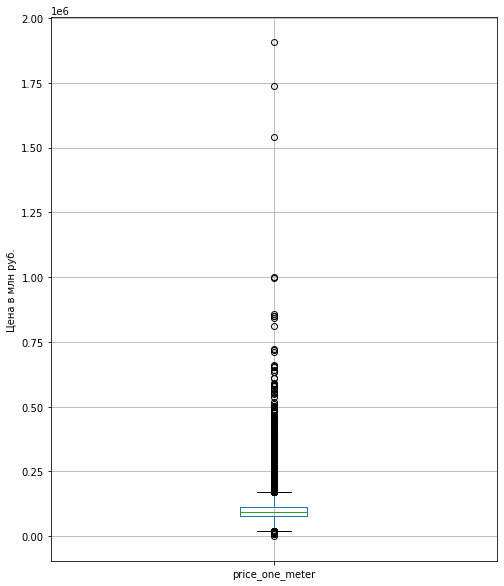

In [40]:
# Смотрим диаграмму размаха
data.boxplot(column=['price_one_meter'], figsize=(8,10), grid=True)
plt.ylabel('Цена в млн руб.')
plt.show()

In [41]:
# Посмотрим на максимальные и минимальные значения
print('Максимальная цена:', data['price_one_meter'].max(), 'рублей')
print('Минимальная цена:', data['price_one_meter'].min(), 'рублей')

Максимальная цена: 1907500.0 рублей
Минимальная цена: 111.83 рублей


Есть аномалии, надо проверить.

In [42]:
# Вызовем 10 маинимальных значений
data.nsmallest(10, ['price_one_meter'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_meter,expo_weekday,expo_month,expo_year,floor_type,city_centers_km
8793,7,12190,109.0,2019-03-20,2,2.750,25,32.0,25,False,False,False,40.5,0,санкт-петербург,36421.0,9176.0,True,805.0,False,NaN,8.0,111.83,2,3,2019,последний,9.0
4405,9,500000,52.0,2018-08-02,2,2.700,2,31.0,1,False,False,False,8.0,0,сланцы,NaN,NaN,False,NaN,False,NaN,110.0,9615.38,3,8,2018,первый,NaN
11351,17,550000,54.0,2019-02-07,2,3.000,2,40.0,1,False,False,False,7.5,0,сланцы,NaN,NaN,False,NaN,False,NaN,78.0,10185.19,3,2,2019,первый,NaN
23477,3,1450000,138.0,2018-07-06,3,2.550,2,58.0,2,False,False,False,12.0,0,гатчина,NaN,NaN,False,NaN,False,NaN,52.0,10507.25,4,7,2018,последний,NaN
23484,11,470000,44.5,2018-07-02,2,2.500,2,28.0,2,False,False,False,7.5,0,сланцы,NaN,NaN,False,NaN,False,NaN,298.0,10561.80,0,7,2018,последний,NaN
5698,7,450000,42.0,2017-07-31,2,2.615,1,23.0,1,False,False,False,5.8,0,будогощь,NaN,NaN,False,NaN,False,NaN,233.0,10714.29,0,7,2017,первый,NaN
19460,13,560000,52.0,2017-11-21,2,3.000,3,30.0,3,False,False,False,6.0,0,сланцы,NaN,NaN,False,NaN,False,NaN,207.0,10769.23,1,11,2017,последний,NaN
9471,4,850000,78.0,2017-05-04,3,2.550,9,12.5,7,False,False,False,8.5,0,гатчина,NaN,NaN,False,NaN,False,NaN,169.0,10897.44,3,5,2017,другой,NaN
15969,8,590000,54.0,2018-06-20,2,2.500,2,32.0,1,False,False,False,8.0,0,сланцы,NaN,NaN,False,NaN,False,NaN,NaN,10925.93,2,6,2018,первый,NaN
16444,15,990000,88.0,2019-04-08,3,2.500,1,40.0,1,False,False,False,6.2,0,оредеж,NaN,NaN,False,NaN,False,NaN,NaN,11250.00,0,4,2019,первый,NaN


Здесь та же аномалия, что и в исследовании стоимости квартир.

In [43]:
# Вызовем 10 максимальных значений цены
data.nlargest(10, ['price_one_meter'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_meter,expo_weekday,expo_month,expo_year,floor_type,city_centers_km
12971,19,763000000,400.0,2017-09-30,7,2.70,10,250.0,10,False,False,False,20.0,2,санкт-петербург,25108.0,3956.0,True,530.0,True,756.0,33.0,1907500.00,5,9,2017,последний,4.0
1436,19,330000000,190.0,2018-04-04,3,3.50,7,95.0,5,False,False,False,40.0,0,санкт-петербург,23011.0,1197.0,True,519.0,True,285.0,233.0,1736842.11,2,4,2018,другой,1.0
22831,18,289238400,187.5,2019-03-19,2,3.37,6,63.7,6,False,False,False,30.2,0,санкт-петербург,22494.0,1073.0,True,386.0,True,188.0,NaN,1542604.80,1,3,2019,последний,1.0
14706,15,401300000,401.0,2016-02-20,5,2.70,9,204.0,9,False,False,False,24.0,3,санкт-петербург,21912.0,2389.0,True,545.0,True,478.0,393.0,1000748.13,5,2,2016,последний,2.0
4996,20,124000000,124.5,2017-10-12,4,3.00,4,67.2,2,False,False,False,20.0,0,санкт-петербург,20399.0,1722.0,True,302.0,True,172.0,45.0,995983.94,3,10,2017,другой,2.0
16461,17,245000000,285.7,2017-04-10,6,3.35,7,182.8,4,False,False,False,29.8,0,санкт-петербург,33143.0,6235.0,True,400.0,True,140.0,249.0,857542.88,0,4,2017,другой,6.0
4859,16,28000000,33.0,2019-04-29,1,3.50,5,17.6,2,False,False,False,9.1,0,санкт-петербург,23447.0,1376.0,True,344.0,True,119.0,NaN,848484.85,0,4,2019,другой,1.0
17172,14,28000000,33.0,2019-04-30,1,3.50,5,17.6,2,False,False,False,9.1,0,санкт-петербург,23403.0,1462.0,True,342.0,True,27.0,NaN,848484.85,1,4,2019,другой,1.0
16647,15,122000000,145.0,2017-04-25,3,3.30,6,36.0,2,False,False,False,72.0,0,санкт-петербург,33931.0,7023.0,True,478.0,True,250.0,335.0,841379.31,1,4,2017,другой,7.0
17912,17,135000000,166.0,2019-02-07,3,3.30,7,52.0,1,False,False,False,64.0,0,санкт-петербург,32863.0,5955.0,True,230.0,True,215.0,NaN,813253.01,3,2,2019,первый,6.0


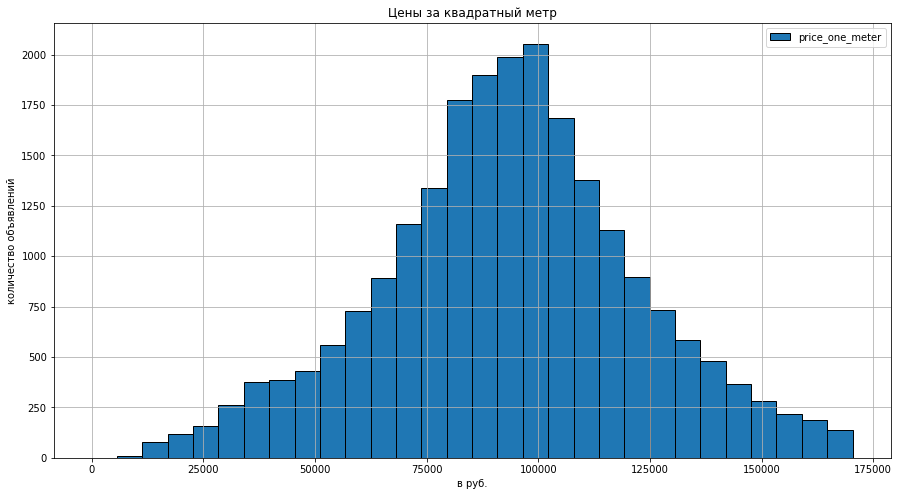

In [44]:
# Рассчитаем квартили чтобы построить график без выбросов
q1 = data['price_one_meter'].quantile(.25) # Q1
q3 = data['price_one_meter'].quantile(.75) # Q3
iqr = q3 - q1 # размах IQR

# Построим гистограмму цены
data['price_one_meter'].hist(bins=30, range=(0, (q3 + 1.5 * iqr)), figsize=(15, 8), ec='black', legend=True)
plt.title('Цены за квадратный метр')
plt.xlabel('в руб.')
plt.ylabel('количество объявлений')
plt.show()

Имеем диапазон цены за квадратный метр примерно **до 170 тыс. руб.** без выбросов. В _большинстве_ объявлений стоит цена в пределах **80-100 тыс. руб.**, а _самое распространённое_ значение около **100 тыс. руб.**, при этом цена _выше_ **150 тыс. руб.** встречается _редко_. Тут _среднее_ значение - около **100 тыс. руб.**, а _медиана_ - **95 тыс. руб.** Длинный "Хвост" у графика также из-за редких, но больших значений.

#### Изучение физических параметров недвижимости
Здесь рассммотрим следующие параметры: общая площадь, жилая, кухня, число комнат, высота потолков, этаж и количество этажей в доме. Построим гистограммы для каждого параметра.

**Общая площадь квартир**

In [45]:
# Общая площадь - total_area
data['total_area'].describe().T

count    23214.000000
mean        60.684223
std         35.721154
min         12.000000
25%         40.200000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

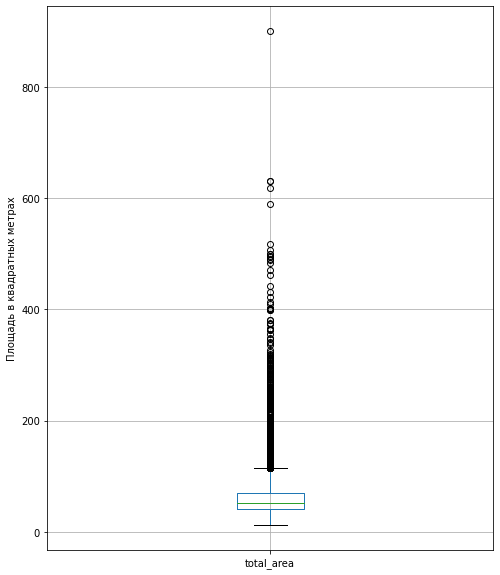

In [46]:
# Постороим диаграмму размаха
data.boxplot(column=['total_area'], figsize=(8,10), grid=True)
plt.ylabel('Площадь в квадратных метрах')
plt.show()

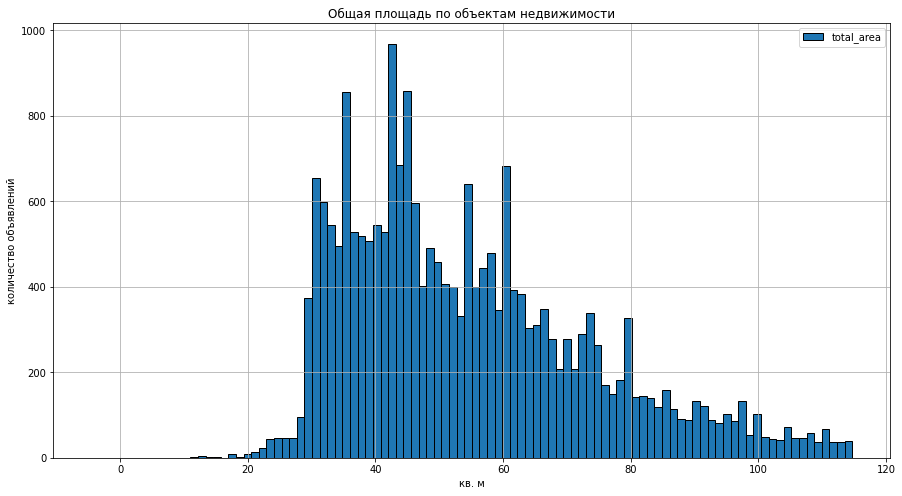

In [47]:
# Рассчитаем квартили для графика без выбросов
q1 = data['total_area'].quantile(.25) # Q1
q3 = data['total_area'].quantile(.75) # Q3
iqr = q3 - q1 # размах IQR

# Построим гистограмму общей площади объектов без выбросов
data['total_area'].hist(bins=100, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(15, 8), ec='black', legend=True)
plt.title('Общая площадь по объектам недвижимости')
plt.xlabel('кв. м')
plt.ylabel('количество объявлений')
plt.show()

Здесь виден диапазон примерно **от 20 до 115 кв. м** без выбросов. Но _большая часть_ объектов имеет площадь **25-75 кв. м**, самое _распространённое_ значение - около **45 кв. м**. Объекты площадью **более 100 кв. м** встречается _редко_, как площадью **меньше 30 кв. м**. _Среднее значение_ **60.7 кв. м** и _медиана_ **52 кв. м** сдвинуты в сторону больших значений. И хотя их _не много_, график получается _растянутым_. Для получения _корректных результатов_ анализа нужно отсечь все значения вне диапазона **20-100 кв. м**. 

Диаграмма размаха площади после отсечения выбивающихся значений


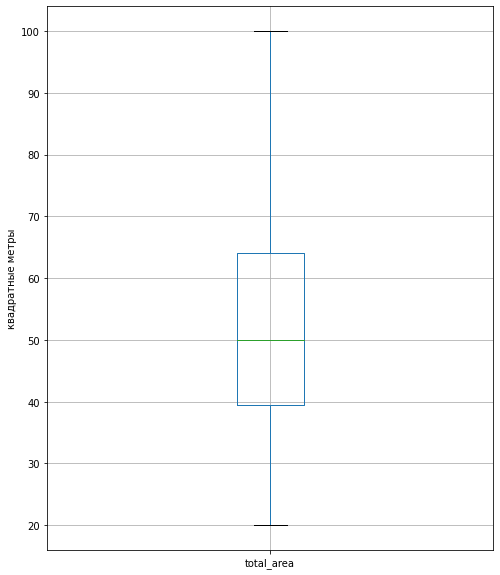

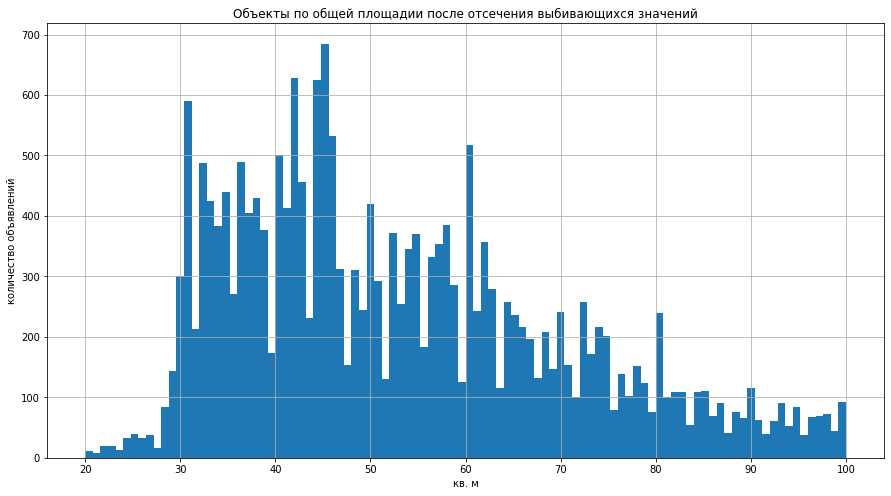

In [48]:
df = data.query('total_area >= 20 & total_area <= 100')
print('Диаграмма размаха площади после отсечения выбивающихся значений')
df.boxplot(column=['total_area'], figsize=(8, 10), grid=True)
plt.ylabel('квадратные метры')
plt.show()

df['total_area'].hist(bins=100, figsize=(15, 8));
plt.title('Объекты по общей площадии после отсечения выбивающихся значений')
plt.xlabel('кв. м')
plt.ylabel('количество объявлений')
plt.show()

**Далее изучим жилую площадь**

In [49]:
# Посмторим описание данных столбца living_area
data['living_area'].describe()

count    23214.000000
mean        34.503326
std         21.817061
min          2.000000
25%         18.500000
50%         30.500000
75%         42.900000
max        409.700000
Name: living_area, dtype: float64

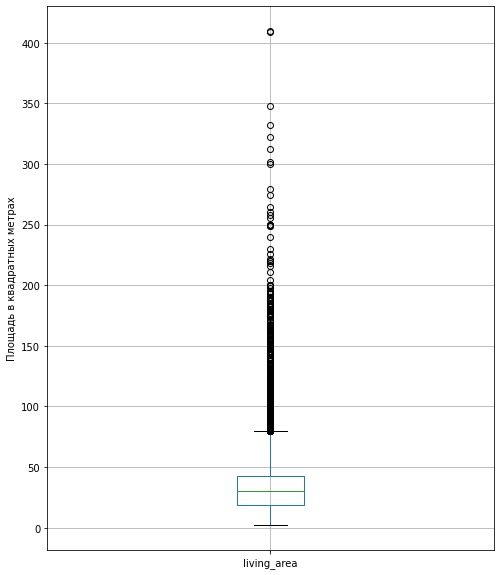

In [50]:
# Постороим диаграмму размаха living_area
data.boxplot(column=['living_area'], figsize=(8,10), grid=True)
plt.ylabel('Площадь в квадратных метрах')
plt.show()

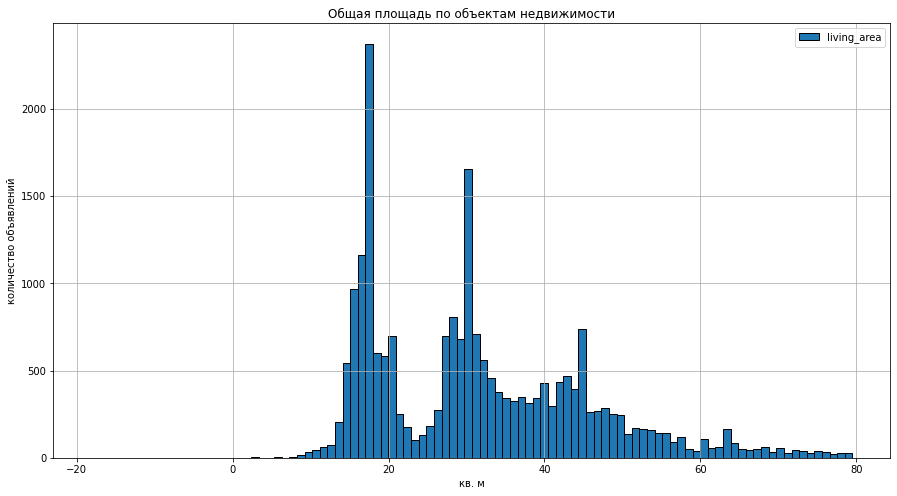

In [51]:
# Рассчитаем квартили для графика living_area без выбросов
q1 = data['living_area'].quantile(.25) # Q1
q3 = data['living_area'].quantile(.75) # Q3
iqr = q3 - q1 # размах IQR

# Построим гистограмму жилой площади объектов без выбросов
data['living_area'].hist(bins=100, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(15, 8), ec='black', legend=True)
plt.title('Общая площадь по объектам недвижимости')
plt.xlabel('кв. м')
plt.ylabel('количество объявлений')
plt.show()

Рассматриваемые значения примерно **до 78 кв. м** _без выбросов_. Здесь видно **три пика** примерными диапазонами **13-22 кв. м**, **28-58 кв м** и **60-68 кв. м**. _Большая_ часть объектов имеют жилую площадь **15-35 кв. м**, а _самые распространённые_ значения около **15 кв. м** (это верятно _однокоматные квартиры_ и _студии_). При этом объекты в диапазоне жилой площади **17-55 кв. м** являются _основной массой_ объявлений, хотя жильё площадью **22-30 кв. м** (это, скорее, _двухкомнатные квартиры советского периода_) и **50-55 кв. м** (это, вероятно _2-3-комантные новостройки_) встречаются редко.
Жилая площадь более **60 кв. м** _самая редкая_ в объявлениях, как площадь **меньше 15 кв. м**. Среднее_ значение - **34.5 кв. м** и _медиана_ - **30.5 кв. м**, графика есть "хвост" из-за _редких, но больших_ значений. Можно попробовать _отсечь_ все значения вне диапазона **15-75 кв. м** и посмотреть на результат.

Диаграмма размаха после отсечения выбивающихся значений


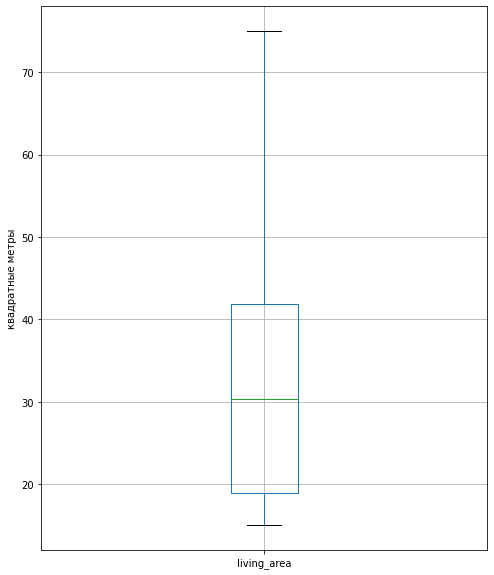

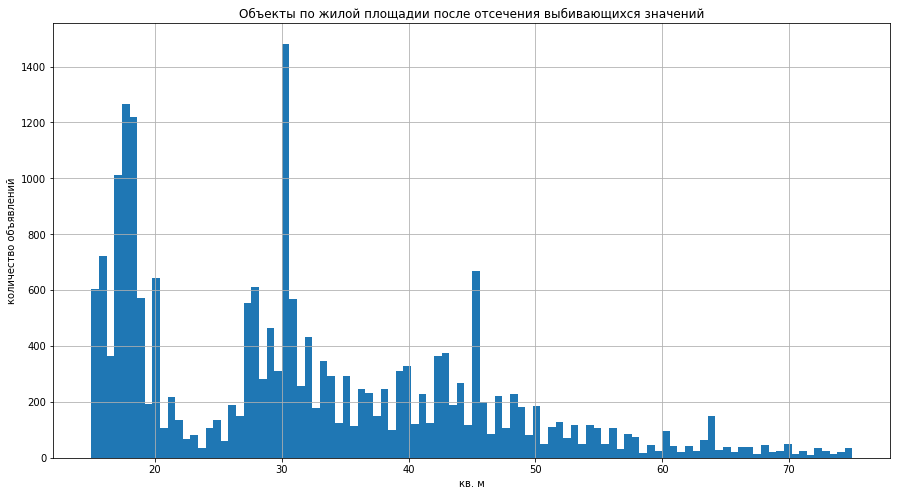

In [52]:
df = data.query('living_area >= 15 & living_area <= 75')
print('Диаграмма размаха после отсечения выбивающихся значений')
df.boxplot(column=['living_area'], figsize=(8, 10), grid=True)
plt.ylabel('квадратные метры')
plt.show()

df['living_area'].hist(bins=100, figsize=(15, 8));
plt.title('Объекты по жилой площадии после отсечения выбивающихся значений')
plt.xlabel('кв. м')
plt.ylabel('количество объявлений')
plt.show()

**Площадь кухни**

In [53]:
# Описание столбца kitchen_area
data['kitchen_area'].describe().T

count    23214.000000
mean        10.474098
std          5.678831
min          1.300000
25%          7.300000
50%          9.100000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64

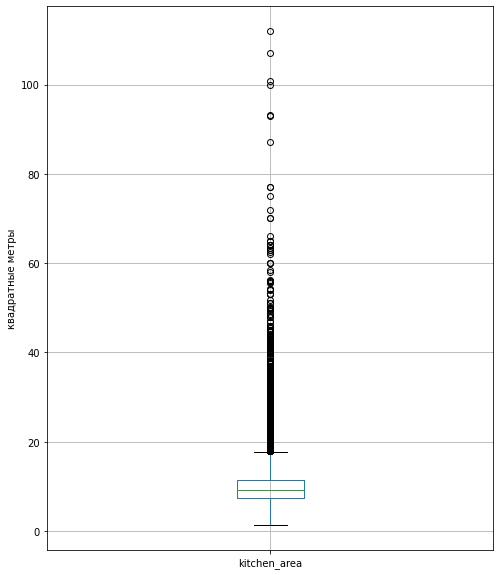

In [54]:
# Постороим диаграмму размаха площади кухниa
data.boxplot(column=['kitchen_area'], figsize=(8,10), grid=True)
plt.ylabel('квадратные метры')
plt.show()

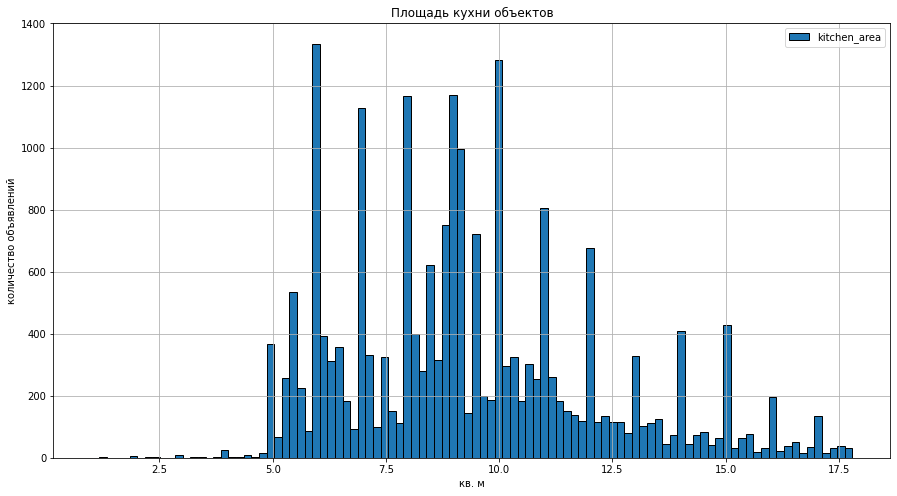

In [55]:
# Рассчитаем квартили для графика без выбросов
q1 = data['kitchen_area'].quantile(.25) # Q1
q3 = data['kitchen_area'].quantile(.75) # Q3
iqr = q3 - q1 # размах IQR

# Построим гистограмму площади
data['kitchen_area'].hist(bins=100, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(15, 8), ec='black', legend=True)
plt.title('Площадь кухни объектов')
plt.xlabel('кв. м')
plt.ylabel('количество объявлений')
plt.show()

Здесь _диапазон_ примерно до **19 кв. м**, исключая выбросы. _Большая часть_ объектов имеет площадь кухни **от 5,5 до 12 кв м**. Самые _распространённые_: **6-7 кв. м**, **8-9 кв. м** и **10-12 кв. м**. Площадь кухни **более 15 кв. м** встречается _редко_, как площадь **менее 5 кв. м**. _Среднее_ значение - **10,5 кв. м**, _медиана_ - **9,1 кв. м**. У графика также наблюдается _небольшой_ "хвост" из-за редких, но больших значений, которые мы и **попробуем отсечь**.

Диаграмма размаха после отсечения выбивающихся значений


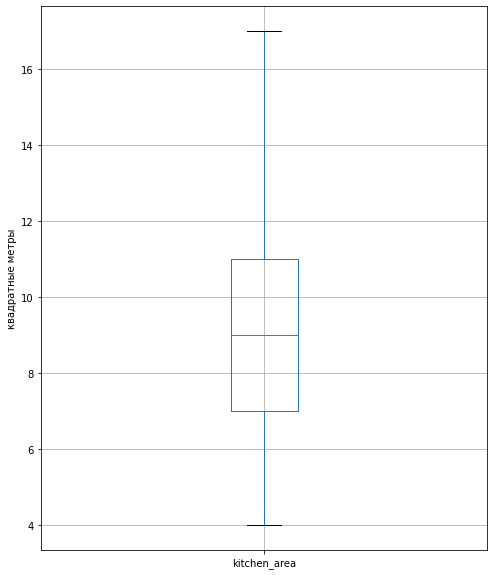

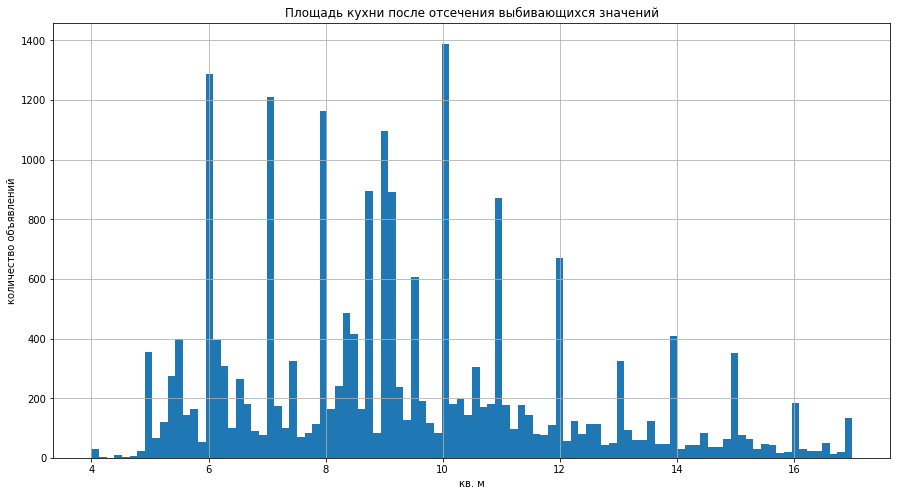

In [56]:
df = data.query('kitchen_area >= 4 & kitchen_area <= 17')
print('Диаграмма размаха после отсечения выбивающихся значений')
df.boxplot(column=['kitchen_area'], figsize=(8, 10), grid=True)
plt.ylabel('квадратные метры')
plt.show()

df['kitchen_area'].hist(bins=100, figsize=(15, 8));
plt.title('Площадь кухни после отсечения выбивающихся значений')
plt.xlabel('кв. м')
plt.ylabel('количество объявлений')
plt.show()

**Количество комнат**

In [57]:
# Смторим описание этого столбца
data['rooms'].describe().T

count    23214.000000
mean         2.089644
std          1.068467
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

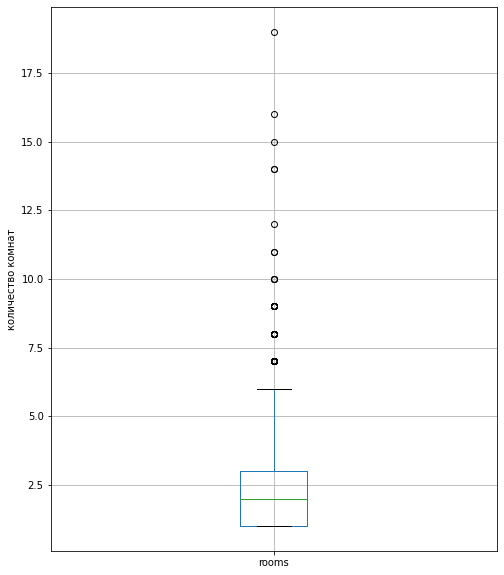

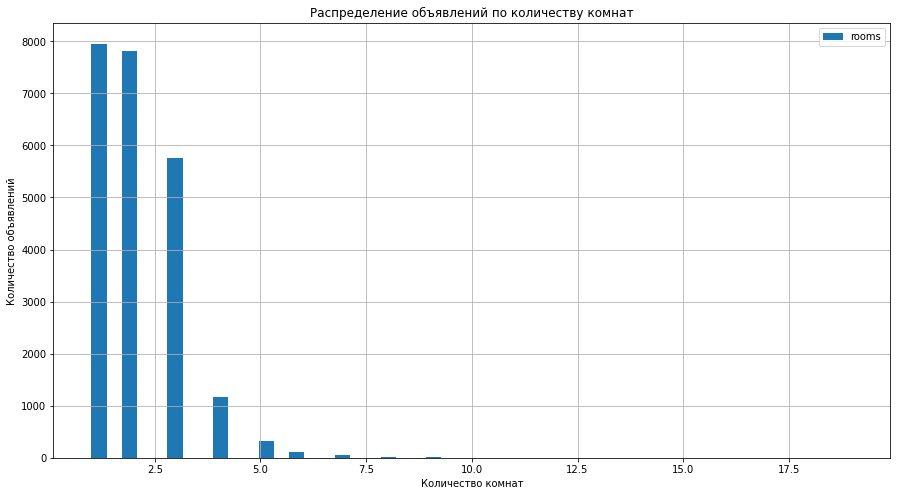

In [58]:
# Постороим диаграмму размаха
data.boxplot(column=['rooms'], figsize=(8,10), grid=True)
plt.ylabel('количество комнат')
plt.show()
# Построим график количество объявлений по количеству комнат
data.plot(bins=50, kind='hist', y='rooms', title='Распределение объявлений по количеству комнат',grid=True, figsize=(15,8))
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()

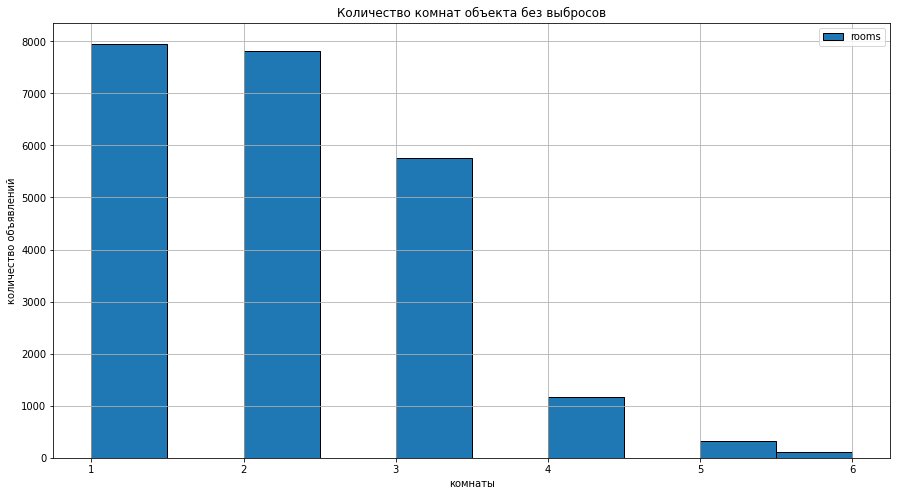

In [59]:
# Рассчитаем квартили для графика без выбросов
q1 = data['rooms'].quantile(.25) # Q1
q3 = data['rooms'].quantile(.75) # Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму кол-ва комнат
data['rooms'].hist(bins=10, range=(1, (q3 + 1.5 * iqr)), figsize=(15, 8), ec='black', legend=True)
plt.title('Количество комнат объекта без выбросов')
plt.xlabel('комнаты')
plt.ylabel('количество объявлений')
plt.show()

Нас _интересует_ диапазон **от 1 до 5 комнат** без  и выбросов и некорректных значений (0 комнат, хотя это могут быть студии... но как студия без комнаты? ошибки?). _Большая_ часть объектов имеют **1-2 комнаты**, чуть _меньше_ - **3 комнаты**. Объявлений с количеством комнат **4-5** относительно _немного_. Здесь _среднее_ и _медиана_  точные и равны **2 комнаты**. Есть _очень редкие_ значения, например,  **от 6 до 19 комнат**, но они _не оказывают влияния_.

**Высота потолков**

In [60]:
# Описание данных
data['ceiling_height'].describe().T

count    23214.000000
mean         2.704857
std          0.225849
min          2.500000
25%          2.550000
50%          2.700000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

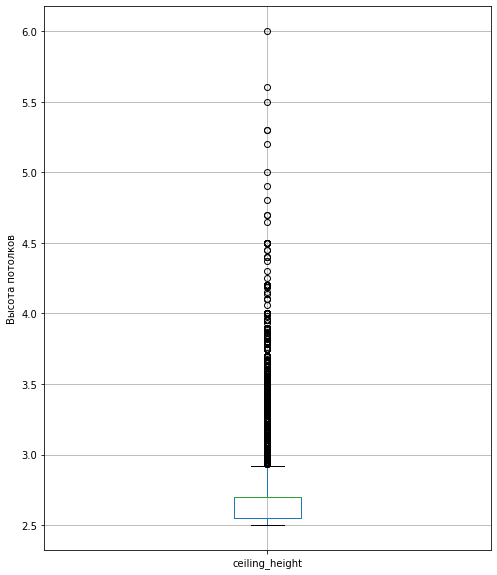

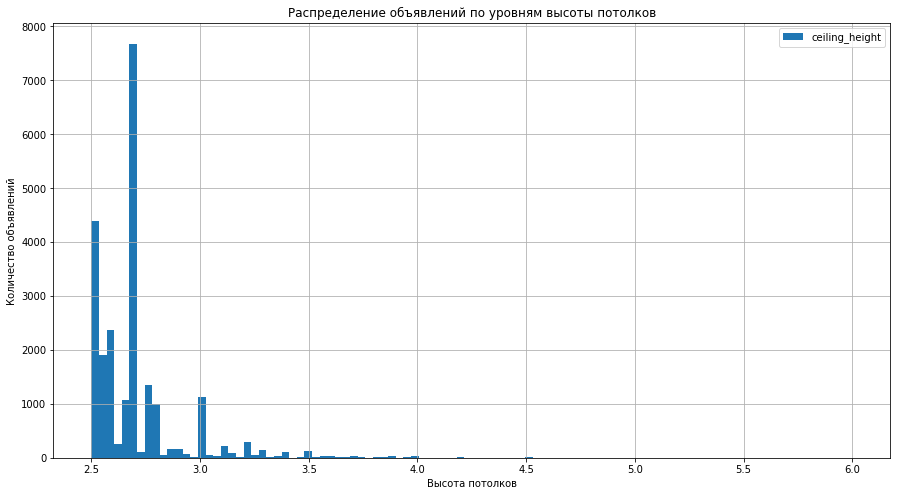

In [61]:
# Посторим диаграмму размаха высоты потолков
data.boxplot(column=['ceiling_height'], figsize=(8,10), grid=True)
plt.ylabel('Высота потолков')
plt.show()

# Построим график количества объявлений по высоте потолков
data.plot(bins=100, kind='hist', y='ceiling_height', title='Распределение объявлений по уровням высоты потолков',grid=True, figsize=(15,8))
plt.xlabel('Высота потолков')
plt.ylabel('Количество объявлений')
plt.show()

Видно, что _наиболее рабочий_ диапазон **2,5-3 м** без выбросов и некорректных значений.

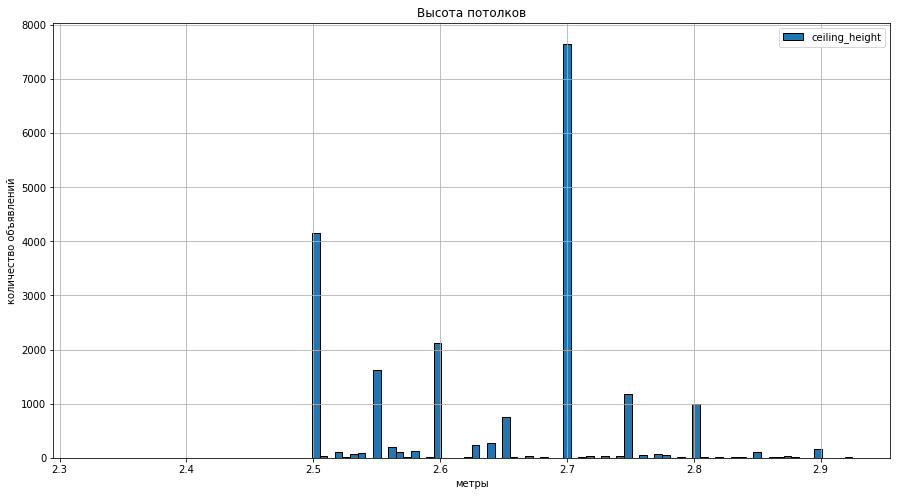

In [62]:
# Рассчитаем квартили для построения графика без выбросов
q1 = data['ceiling_height'].quantile(.25) # Q1
q3 = data['ceiling_height'].quantile(.75) # Q3
iqr = q3 - q1 # межквартильный размах

# Построим гистограмму ceiling_height
data['ceiling_height'].hist(bins=100, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(15, 8), ec='black', legend=True)
plt.title('Высота потолков')
plt.xlabel('метры')
plt.ylabel('количество объявлений')
plt.show()

_В большинстве_ объявлений указана высота потолков **2,7 м**. Также _наиболее популярные_ значения: **2,5 м**, **2,55 м**, **2,6 м**, **2,75** и **2,8 м**. _Намного реже_ представлены промежуточные значения, а также варианты **2,65 м** и выше **2,8 м**. _Среднее_ значение и _медиана_ совпадают и равны **2,7 м**.

**Этаж, его тип и высотность дома**

In [63]:
# Cмторим описание столбца floor
data['floor'].describe().T

count    23214.000000
mean         5.858275
std          4.834627
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

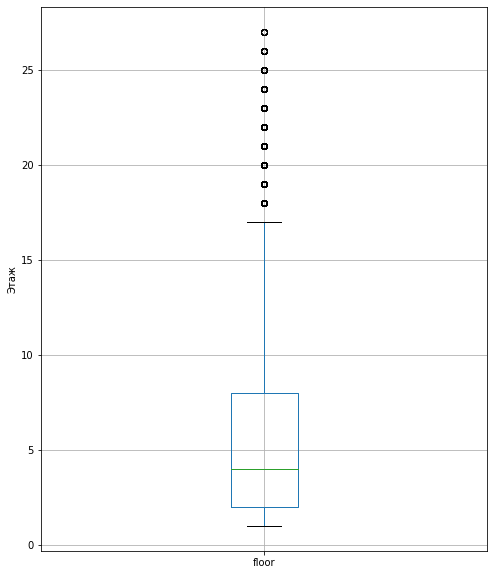

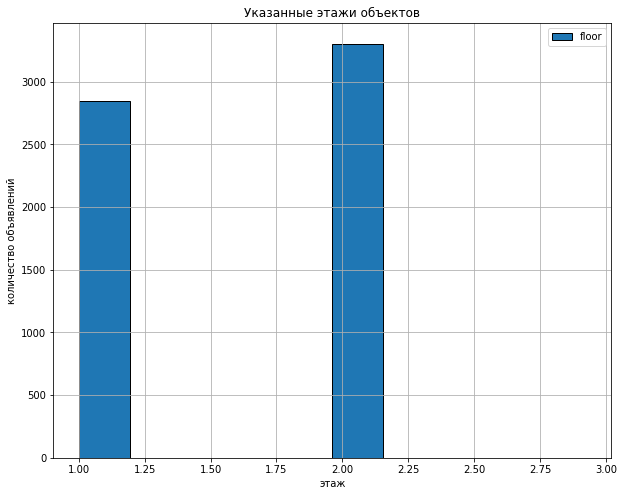

In [64]:
# Посторим диаграмму размаха
data.boxplot(column=['floor'], figsize=(8,10), grid=True)
plt.ylabel('Этаж')
plt.show()

# Построим гистограмму указанных этажей относительно количества объявлений
data['floor'].hist(bins=10, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Указанные этажи объектов')
plt.xlabel('этаж')
plt.ylabel('количество объявлений')
plt.show()

In [65]:
# Сразу рассчитаем квартили для построения графика без выбросов
q1 = data['floor'].quantile(.25) # Q1
q3 = data['floor'].quantile(.75) # Q3
iqr = q3 - q1 # размах IQR

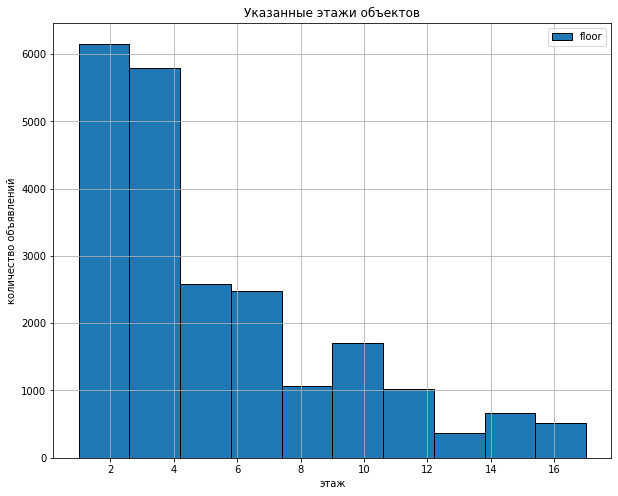

In [66]:
# Ещё раз построим график указанных этажей без выбросов
data['floor'].hist(bins=10, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Указанные этажи объектов')
plt.xlabel('этаж')
plt.ylabel('количество объявлений')
plt.show()

_Без некорректных значений и выбросов_ подходит диапазон **с 1 по 17 этаж**. В _большинстве объявлений_ указаны **1-4 этажи**, _реже_ - **5-7 этажи** и **10 этаж**, остальные значения в пределах _5-6%_ от общего количества объявлений. _Среднее_ значение на **6 этаже**, а _медиана_ на **4 этаже**.

In [67]:
# Вспомним категоризацию по типу этажа
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_meter,expo_weekday,expo_month,expo_year,floor_type,city_centers_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,True,482.0,True,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,False,False,False,11.0,2,шушары,12817.0,18603.0,False,NaN,False,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,True,90.0,True,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.70,14,45.0,9,False,False,False,9.5,0,санкт-петербург,28098.0,6800.0,True,84.0,True,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,True,112.0,True,48.0,121.0,100000.00,1,6,2018,другой,8.0


In [68]:
# Посмотрим описание столбца floor_type
data['floor_type'].describe().T

count      23214
unique         3
top       другой
freq       17086
Name: floor_type, dtype: object

In [69]:
# Получим количество значений в каждой категории
data['floor_type'].value_counts()

другой       17086
последний     3278
первый        2850
Name: floor_type, dtype: int64

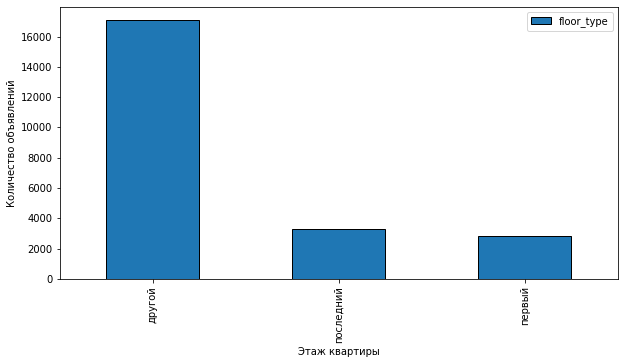

In [70]:
# Посмотрим на графике типы этажей
data['floor_type'].value_counts().plot.bar(figsize=(10, 5), ec='black', legend=True)
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество объявлений')
plt.show()

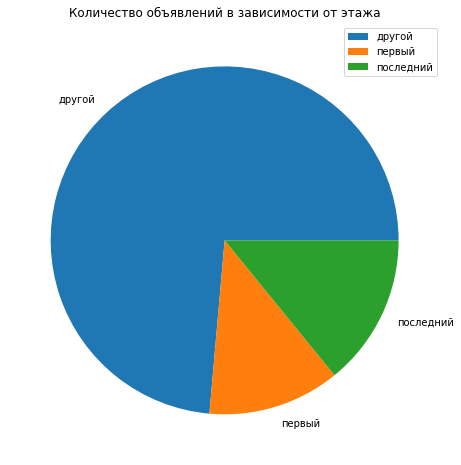

In [71]:
# Или на круговой диаграмме
data.pivot_table(index='floor_type', aggfunc='count') \
  .plot.pie(y='last_price', figsize=(15, 8), label='', title='Количество объявлений в зависимости от этажа')
plt.show()

Здесь видно, что **первый** и **последний этаж** указаны в объявлениях примерно _одинаковое_ количество раз и их доля _не такая большая_ - на двоих **чуть больше 25%**. _Основная масса_ объектов расположена **на промежуточных этажах** между первым и последним.

In [72]:
# Посмотрим статистику столбца количества этажей в доме floors_total
data['floors_total'].describe().T

count    23214.000000
mean        10.626303
std          6.508120
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

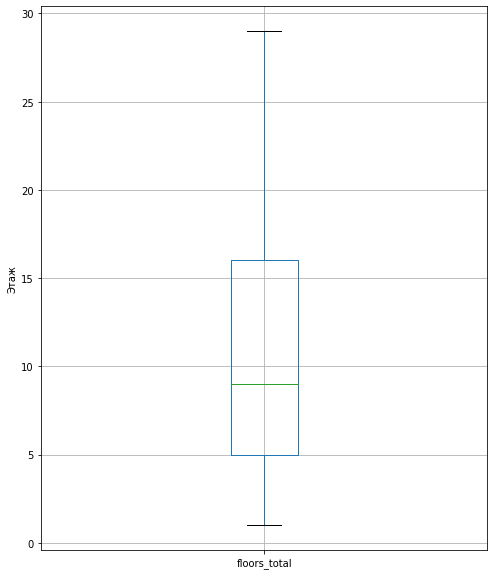

In [73]:
# Посторим диаграмму размаха
data.boxplot(column=['floors_total'], figsize=(8, 10), grid=True)
plt.ylabel('Этаж')
plt.show()

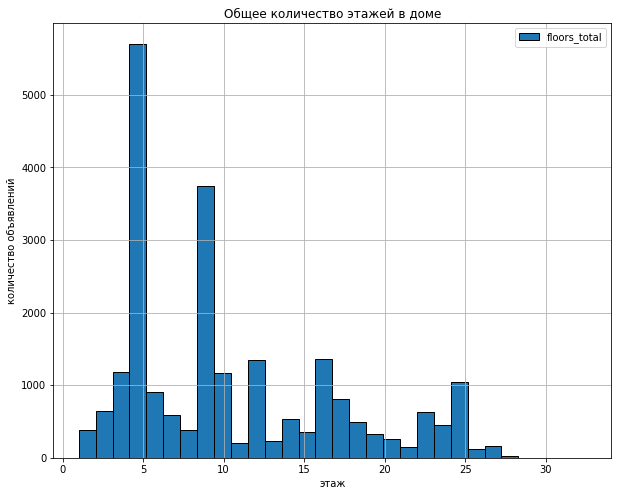

In [74]:
# Рассчитаем квартили для построения графика
q1 = data['floors_total'].quantile(.25) # Q1
q3 = data['floors_total'].quantile(.75) # Q3
iqr = q3 - q1 # размах IQR

# Построим гистограмму общего количества этажей в доме
data['floors_total'].hist(bins=30, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Общее количество этажей в доме')
plt.xlabel('этаж')
plt.ylabel('количество объявлений')
plt.show()

Здесь диапазон **с 1 по 29 этаж**, _исключая_ некорректные значения и выбросы. _Большинство_ объектов расположены **в 5- и 9-этажных домах**. Другие варианты представлены _реже_, но присутствуют на рынке. _Среднее_ - **11 этаж**, _медиана_ - **9 этаж**.

**Выводы:**<br>
Большинство квартир общей площадью менее 100 кв. м, большей площади объекты практически не встречается. Однако есть несколько очень больших и странных значений более 200 кв. м, но их количество крайне мало.<br>
Самые распространённые значения жилой площади - от 15 до 50 кв. м. Больше 80 кв. метров - единичные случаи. На графике есть два пика, которые вызваны, вероятно, значениями жилой площади для 1-комнатной, затем для 2-комнатной, а после для 3-комнатной квартиры.<br>
Самая частая площадь кухни - от 6 до 15 кв. м, больше, включая 20 кв. м, значения крайне редкие, а выше 30 кв. м вообще единичные случаи.<br>
В основном квартиры состоят из 1, 2 и 3 комнат, но есть небольшая доля 4-комнатных квартир. Вместе с тем встречаются варианты с 5-6 комнатами, есть и 7 комнат, что бывает при объединении нескольких квартир в одну. Однако это выглядит подозрительно, возможно, это отдельный дом.<br>
В большей части объявлений указана высота потолков от 2,5 до 3 метров. Встречаются значения больше 4 метров, н очень редко. Аномальные значения в 27 метров (высота 9-этажного дома), скорее всего, являются ошибкой.<br>
Квартиры на первом и последнем этаже продаются реже, в объявлениях их примерно одинаковое количество. В основной массе объявлений указаны этажи между первым и последним.<br>
Чаще всего квартиры продаются в 5- и 9-этажных домах, на втором месте 12- и 16-этажые дома, затем идут 4-, 10- и 24 этажные дома.

#### Изучение географических параметров объектов недвижимости
Здесь изучим расстояние до центра города, близость аэропорта, наличие парков и водоёмов около дома. Построим гистограммы для каждого параметра.

**Расстояние до центра города**

Вспомним, что все географические значения в столбцах _city_centers_nearest_, _airports_nearest_, _parks_nearest_ и _ponds_nearest_ указаны **в метрах**.

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23214 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23214 non-null  int64         
 1   last_price            23214 non-null  int64         
 2   total_area            23214 non-null  float64       
 3   first_day_exposition  23214 non-null  datetime64[ns]
 4   rooms                 23214 non-null  int64         
 5   ceiling_height        23214 non-null  float64       
 6   floors_total          23214 non-null  int64         
 7   living_area           23214 non-null  float64       
 8   floor                 23214 non-null  int64         
 9   is_apartment          23214 non-null  bool          
 10  studio                23214 non-null  bool          
 11  open_plan             23214 non-null  bool          
 12  kitchen_area          23214 non-null  float64       
 13  balcony         

In [76]:
# Посмотрим описание столбца city_centers_nearest
data['city_centers_nearest'].describe()

count    17979.000000
mean     14170.775609
std       8625.611065
min        181.000000
25%       9234.000000
50%      13056.000000
75%      16267.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

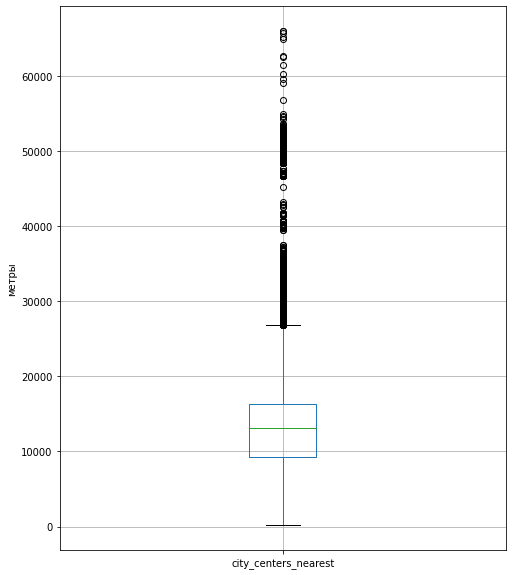

In [77]:
# Посторим диаграмму размаха
data.boxplot(column=['city_centers_nearest'], figsize=(8, 10), grid=True)
plt.ylabel('метры')
plt.show()

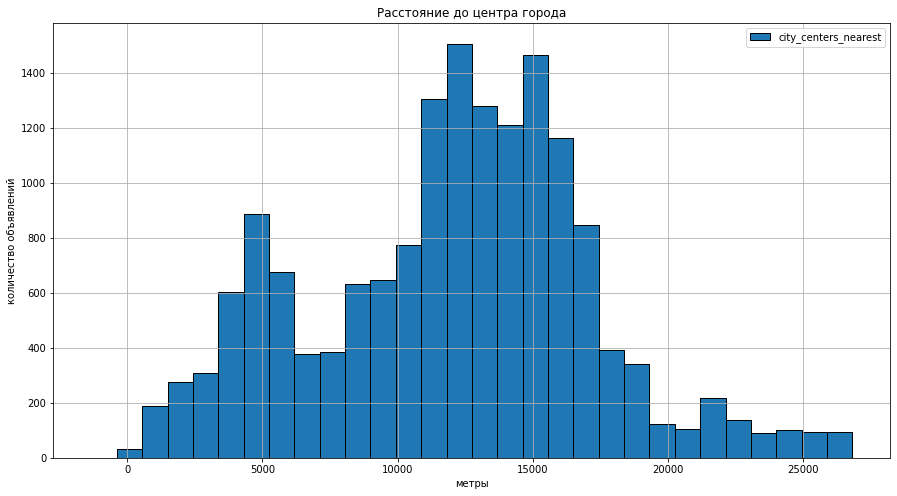

In [78]:
# Рассчитаем квартели для построения графика без выбросов
q1 = data['city_centers_nearest'].quantile(.25) # Q1
q3 = data['city_centers_nearest'].quantile(.75) # Q3
iqr = q3 - q1 # межквартильный размах

# Построим график количества объявлений в зависимости от расстояния до центра города
data['city_centers_nearest'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(15, 8), ec='black', legend=True)
plt.title('Расстояние до центра города')
plt.xlabel('метры')
plt.ylabel('количество объявлений')
plt.show()

Без ошибок и выбросов _подходит_ для анализа диапазон **с 3 тыс. до 22 тыс. метров**. _Большинство_ объектов расположены на расстоянии **12-16 км** от центра. _Другие_ варианты представлены _реже_. В данных _среднее значение_ - **14 км** и _медиана_ - **13 км**.

**Расстояние до ближайшего аэропорта**

In [79]:
# Смотрим статистику для столбца airports_nearest
data['airports_nearest'].describe()

count    17979.000000
mean     28827.874889
std      12593.343837
min          0.000000
25%      18623.000000
50%      26862.000000
75%      37228.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Видим _минимальное_ знаение - **ноль**, что означает _нахождение квартиры на территории аэропорта_, хотя такого **быть не может**. Исключим эти ошибки.

In [80]:
# Убераем ноль из значений
data = data.query('airports_nearest != 0')

In [81]:
# Проверим
data['airports_nearest'].describe().T

count    17978.000000
mean     28829.478397
std      12591.858484
min       6450.000000
25%      18625.000000
50%      26866.500000
75%      37228.000000
max      84869.000000
Name: airports_nearest, dtype: float64

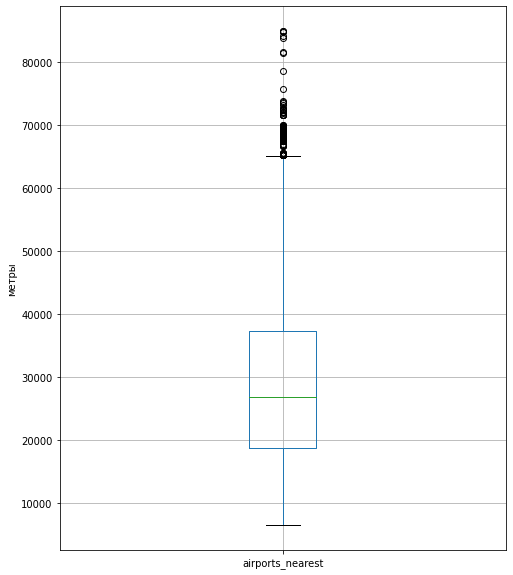

In [82]:
# Посмотрим диаграмму размаха
data.boxplot(column=['airports_nearest'], figsize=(8, 10), grid=True)
plt.ylabel('метры')
plt.show()

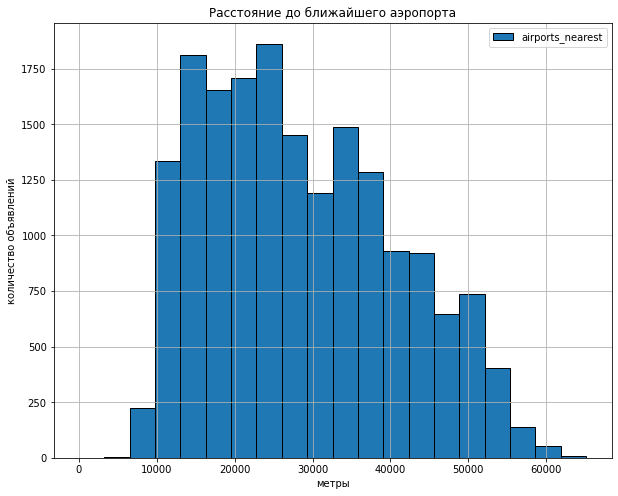

In [83]:
# Рассчитаем квартили для построения графика без выбросов
q1 = data['airports_nearest'].quantile(.25) # Q1
q3 = data['airports_nearest'].quantile(.75) # Q3
iqr = q3 - q1 # размах IQR

# Построим гистограмму количества объявлений по расстоянию до аэропорта
data['airports_nearest'].hist(bins=20, range=(0, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('метры')
plt.ylabel('количество объявлений')
plt.show()

Здесь диапазон **от 5000 до 65000 м** (это 6-65 км). _Большинство_ объектов расположены от аэропорта на расстоянии **15-25 км**. _Ближайший к аэропорту_ объект указан на расстоянии **6,5 км**. Здесь _среднее_ значение - **28,9 км**, а _медиана_ - **26,9 км**.

**Расстояние до ближайшего парка**

In [84]:
# Посмотрим описательную статистику
data['parks_nearest'].describe().T

count    7978.000000
mean      488.852093
std       336.966462
min         1.000000
25%       287.000000
50%       453.000000
75%       612.000000
max      2984.000000
Name: parks_nearest, dtype: float64

**Один метр** до парка? Это вряд ли. Проверяем.

In [85]:
# Вызовем 10 маинимальных значений в колонке parks_nearest
data.nsmallest(10, ['parks_nearest'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_meter,expo_weekday,expo_month,expo_year,floor_type,city_centers_km
14624,8,3770000,45.40,2019-03-20,2,2.7,9,28.43,2,False,False,False,6.9,0,санкт-петербург,43932.0,16436.0,True,1.0,False,NaN,42.0,83039.65,2,3,2019,другой,16.0
11949,7,4500000,44.00,2017-11-24,2,2.6,9,30.00,7,False,False,False,7.0,0,санкт-петербург,11806.0,12292.0,True,3.0,True,508.0,82.0,102272.73,4,11,2017,другой,12.0
22941,8,10965000,69.30,2019-01-10,1,3.0,4,48.90,4,True,False,False,9.1,2,зеленогорск,73391.0,54490.0,True,4.0,True,217.0,110.0,158225.11,3,1,2019,последний,54.0
9344,12,3000000,28.10,2017-07-25,1,2.5,9,17.00,1,False,False,False,5.6,0,санкт-петербург,12051.0,11665.0,True,7.0,True,780.0,440.0,106761.57,1,7,2017,первый,12.0
2527,8,4690000,60.30,2016-03-05,2,2.5,5,28.00,2,False,False,False,7.9,0,кронштадт,69775.0,51500.0,True,9.0,True,345.0,146.0,77777.78,5,3,2016,другой,52.0
20193,3,11809670,102.60,2017-04-21,3,2.7,9,45.00,3,False,False,False,17.8,2,санкт-петербург,27562.0,6410.0,True,9.0,True,480.0,90.0,115104.00,4,4,2017,другой,6.0
189,0,6150000,62.00,2017-10-13,3,2.7,9,41.50,5,False,False,False,8.5,2,санкт-петербург,41954.0,12168.0,True,10.0,False,NaN,45.0,99193.55,4,10,2017,другой,12.0
214,5,4150000,50.41,2017-07-20,2,2.5,9,31.10,8,False,False,False,7.0,1,санкт-петербург,41954.0,12168.0,True,10.0,False,NaN,274.0,82324.94,3,7,2017,другой,12.0
4470,7,2750000,30.90,2017-12-19,1,2.7,9,15.00,3,False,False,False,8.0,0,санкт-петербург,41954.0,12168.0,True,10.0,False,NaN,45.0,88996.76,1,12,2017,другой,12.0
7788,14,5550000,55.10,2017-06-25,2,2.7,7,33.60,3,False,False,False,7.1,1,санкт-петербург,43990.0,10661.0,True,10.0,True,786.0,88.0,100725.95,6,6,2017,другой,11.0


Видим, что значений **меньше 10 метров** (примерно столько от подъезда/парадной до границы парка через дорогу) всего **пять**. Значит можем от них _избавиться_.

In [86]:
# Убераем значения меньше 10 метров
df = data.query('parks_nearest >= 10')

In [87]:
# Проверим
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,7972.0,1.021927e+01,5.757757e+00,0.00,6.000000e+00,10.00,14.00,50.0
last_price,7972.0,9.093354e+06,1.548151e+07,12190.00,4.300000e+06,5900000.00,9200000.00,763000000.0
total_area,7972.0,6.905739e+01,4.381415e+01,12.00,4.300000e+01,57.00,80.00,590.0
rooms,7972.0,2.289388e+00,1.193981e+00,1.00,1.000000e+00,2.00,3.00,16.0
ceiling_height,7972.0,2.772944e+00,2.838343e-01,2.50,2.600000e+00,2.70,2.80,6.0
floors_total,7972.0,9.502132e+00,5.557073e+00,1.00,5.000000e+00,9.00,12.00,28.0
living_area,7972.0,3.970150e+01,2.729621e+01,3.00,2.047500e+01,33.00,47.20,409.0
floor,7972.0,5.305946e+00,4.191813e+00,1.00,2.000000e+00,4.00,7.00,26.0
kitchen_area,7972.0,1.128495e+01,6.954660e+00,2.00,7.400000e+00,9.30,12.50,107.0
balcony,7972.0,5.220773e-01,9.415961e-01,0.00,0.000000e+00,0.00,1.00,5.0


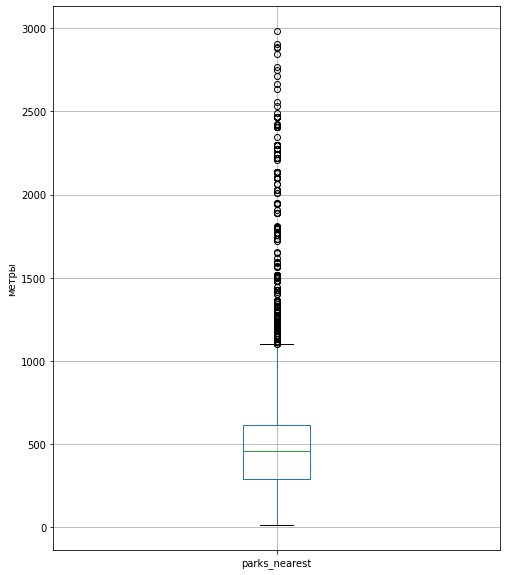

In [88]:
# Построим диаграмму размаха
df.boxplot(column=['parks_nearest'], figsize=(8, 10), grid=True)
plt.ylabel('метры')
plt.show()

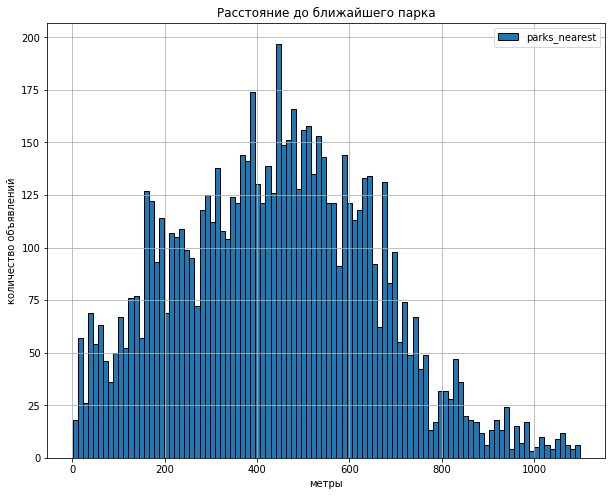

In [89]:
# Рассчитаем квартили для построения графика без выбросов
q1 = data['parks_nearest'].quantile(.25) # Q1
q3 = data['parks_nearest'].quantile(.75) # Q3
iqr = q3 - q1 # размах IQR

# Построим гистограмму растояния до парки и количества объявлений
data['parks_nearest'].hist(bins=100, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до ближайшего парка')
plt.xlabel('метры')
plt.ylabel('количество объявлений')
plt.show()

_Рассматриваемый_ диапазон **от 0 до 1100 м**, хотя _встречаются_ объявления, в которых указано расстояние до парка и **1,5 км**, и **2 км**, и **3 км**, но их _мало_. В то же время в _большинстве_ объявлений указано расстояние до ближайшего парка **400-600 м**. _Ближайшие_ к парку объекты на расстоянии **10 м**. Здесь _среднее_ - **489 м**, а _медиана_ - **453,5 м**.

**Расстояние до ближайшего водоёма**

In [90]:
# Посмотрим описательную статистику
data['ponds_nearest'].describe().T

count    8938.000000
mean      519.567577
std       277.360555
min        13.000000
25%       295.000000
50%       503.000000
75%       732.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

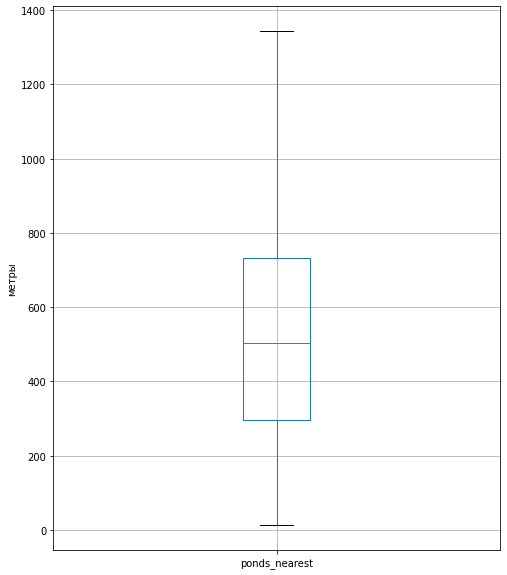

In [91]:
# Построим диаграмму размаха
data.boxplot(column=['ponds_nearest'], figsize=(8, 10), grid=True)
plt.ylabel('метры')
plt.show()

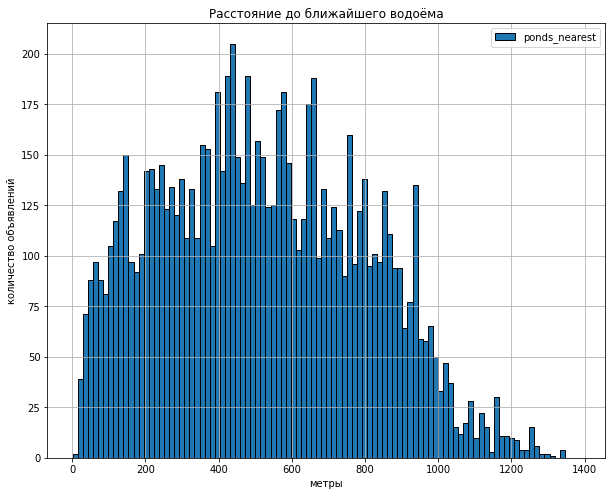

In [92]:
# Рассчитаем квартили для построения графика без выбросов
q1 = data['ponds_nearest'].quantile(.25) # Q1
q3 = data['ponds_nearest'].quantile(.75) # Q3
iqr = q3 - q1 # размах IQR

# Построим гистограмму растояния до парки и количества объявлений
data['ponds_nearest'].hist(bins=100, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до ближайшего водоёма')
plt.xlabel('метры')
plt.ylabel('количество объявлений')
plt.show()

Вполне _подходящие_ данные диапазона **от 10 до 1400 м**. В _большинстве_ объявлений указано расстояние до вооёма **от 200 до 500 м**. _Достаточно много_ объявлений со значениями **600-900 м**. Здесь _среднее_ - **485,6 м**, а _медиана_ - **457 м**.

**Выводы:**
Согласно имеющимся географическим данным _большинство_ объектов недвижимости из полученной таблицы расположены на расстоянии **12-16 км** от центра города.<br>
До ближайшего аэропорта в _большинстве_ объявлений указано расстояние **15-25 км**, а от _самого ближнего_ объекта - **6,5 км**.<br>
Расстояние до ближайшего парка _наиболее часто_ указано **400-600 м**, но есть объекты, которые находятся _непосредственно у границ_ парков.<br>
То же самое с водоёмами, что неудивительно, _учитывая гидрографию_ Санкт-Петербурга и Ленинградской области. В _большинстве_ случаев дистанция до водоёма **200-500 м**, хотя _приличное количество_ объектов на расстоянии в **600-900 м**.<br>
Из этого раздела видно, что чаще всего парки и водоёмы расположены в пешей доступности от продаваемых квартир, а до аэропорта и центра города можно доехать на такси за полчаса-час.

**Промежуточные итоги:**<br>
Рассмотренные выше данные дают представление о _типичном_ объекте недвижимости из всех объявлений: **1-**, **2-** или **3-комнатная** квартира в **5-** или **9-этажном** доме, расположенная на этаже **со второго по четвёртый** или **по восьмой**. Этот объект имеет _общую площадь_ около **45-60 кв. м**, _кухню_ - около **6-9 кв. м**, _высоту потолков_ - **2,5-2,7 м**. Объект расположен _от центра города_ на расстоянии **11-16 км**, _от аэропорта_ - **15-25 км**, _от ближайшего парка и водоёма_ - около **500 метров**.

#### Изучение временных параметров объявлений
Здесь изучим, когда публиковались объявления, сколько они провисели, корреляцию цены и длительности объяления, зависимость цены от даты размещения и дня недели. Построим графики для каждого параметра.

In [93]:
# Вспомним столбцы в датафрейме, в частности новые колонки
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23213 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23213 non-null  int64         
 1   last_price            23213 non-null  int64         
 2   total_area            23213 non-null  float64       
 3   first_day_exposition  23213 non-null  datetime64[ns]
 4   rooms                 23213 non-null  int64         
 5   ceiling_height        23213 non-null  float64       
 6   floors_total          23213 non-null  int64         
 7   living_area           23213 non-null  float64       
 8   floor                 23213 non-null  int64         
 9   is_apartment          23213 non-null  bool          
 10  studio                23213 non-null  bool          
 11  open_plan             23213 non-null  bool          
 12  kitchen_area          23213 non-null  float64       
 13  balcony         

Из временных параметров нам нужны данные из **expo_weekday**, **expo_month**, **expo_year** и **days_exposition**.

**День размещения объявления**

In [94]:
# Традиционно смотрим описание
data['expo_weekday'].describe().T

count    23213.000000
mean         2.565674
std          1.788719
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: expo_weekday, dtype: float64

Вспомним нумерацию дней недели: 0 - понедельник, 1 - вторник... и 6 - воскресенье.

In [95]:
# Посмотрим количество объявлений по каждому дню недели
data['expo_weekday'].value_counts().sort_values()

6    1656
5    1897
0    3549
2    3893
4    3904
1    4104
3    4210
Name: expo_weekday, dtype: int64

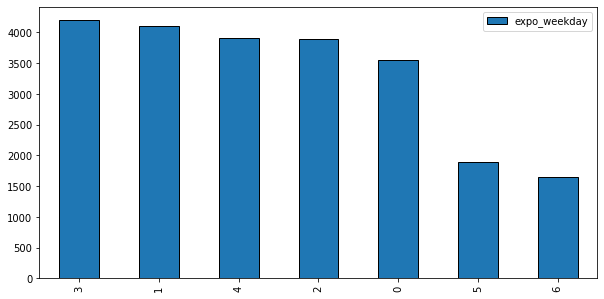

In [96]:
# Построим график
data['expo_weekday'].value_counts().plot.bar(figsize=(10, 5), ec='black', legend=True)
plt.show()

Здесь видно, что _чаще всего_ объявления публиковали в будни: **вторник**, **среда**, **четверг**. На _втором месте_ идут **пятница** и **понедельник**. А _реже всего_ в **выходные дни**.

**Месяц публикации**

In [97]:
# Статистика столбца
data['expo_month'].describe().T

count    23213.000000
mean         6.393659
std          3.492334
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: expo_month, dtype: float64

In [98]:
# Посмотрим число объявлений по каждому месяцу
data['expo_month'].value_counts().sort_values()

5     1249
1     1476
12    1612
7     1664
8     1704
6     1727
9     1933
10    2080
11    2309
4     2329
3     2537
2     2593
Name: expo_month, dtype: int64

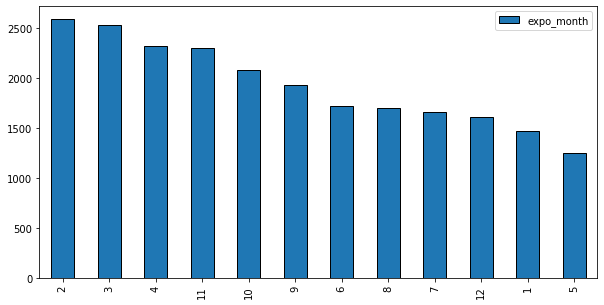

In [99]:
# Построим график
data['expo_month'].value_counts().plot.bar(figsize=(10, 5), ec='black', legend=True)
plt.show()

Видно, что _чаще всего_ объявления размещают **в феврале** и **марте**, _реже всего_ - **в январе** и **в мае**. Скорее всего, это связано с длинными каникулами в январе и праздниками в мае. Однако _больше_ людей решаются на продажу квартиры с **февраля** по **апрель** и с **августа** по **ноябрь**.

**Срок продажи квартиры**

В колонке days_exposition указано, как быстро продавались квартиры, то есть, сколько дней было размещено каждое объявление.
Расмотрим эти данные, построем гистограмму, посчитаем среднее и медиану. Потом выясним, сколько времени обычно занимает продажа, какие продажы можно считать быстрыми, а какие — необычно долгими.

In [100]:
# Смотрим описание данных
data['days_exposition'].describe().T

count    20096.000000
mean       181.847631
std        220.479830
min          1.000000
25%         45.000000
50%         96.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64

Здесь есть **аномальные** значения: продажа за один день, или срок объявления больше 4 лет.

In [101]:
# Посмотрим количество объявлений по срокам
data['days_exposition'].value_counts().sort_values()

1174.0      1
1007.0      1
1072.0      1
1252.0      1
1182.0      1
         ... 
90.0      200
30.0      202
7.0       225
60.0      532
45.0      845
Name: days_exposition, Length: 1139, dtype: int64

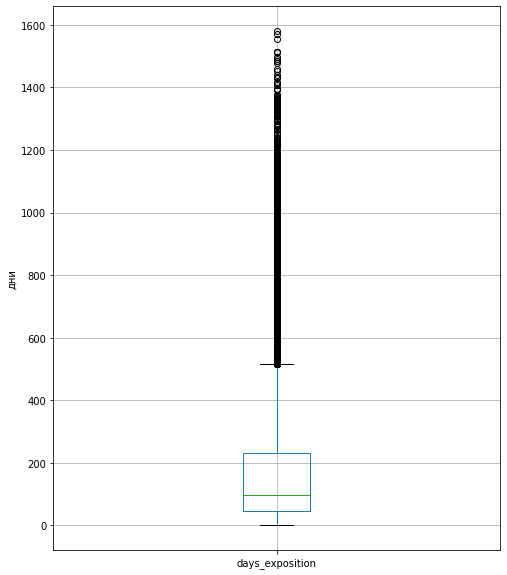

In [102]:
# Построим диаграмму размаха
data.boxplot(column=['days_exposition'], figsize=(8, 10), grid=True)
plt.ylabel('дни')
plt.show()

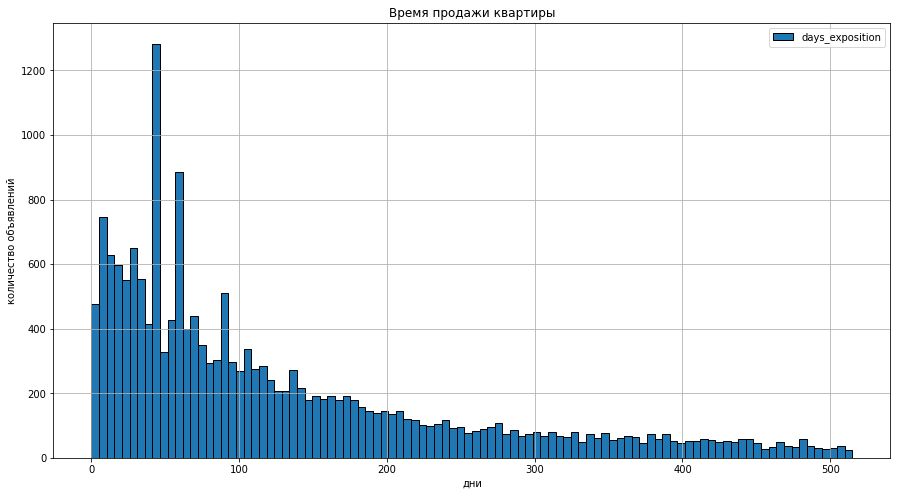

In [103]:
# Рассчитаем квартили для построения графика без выбросов
q1 = data['days_exposition'].quantile(.25) # Q1
q3 = data['days_exposition'].quantile(.75) # Q3
iqr = q3 - q1 # размах IQR

# Построим гистограмму времени продажи квартиры
data['days_exposition'].hist(bins=100, range=(0, (q3 + 1.5 * iqr)), figsize=(15, 8), ec='black', legend=True)
plt.title('Время продажи квартиры')
plt.xlabel('дни')
plt.ylabel('количество объявлений')
plt.show()

На графике видны **пики** на отметке **50-60 дней**. Однако этот длинный "хвост" _мешает_. Изменим период **до 250 дней**.

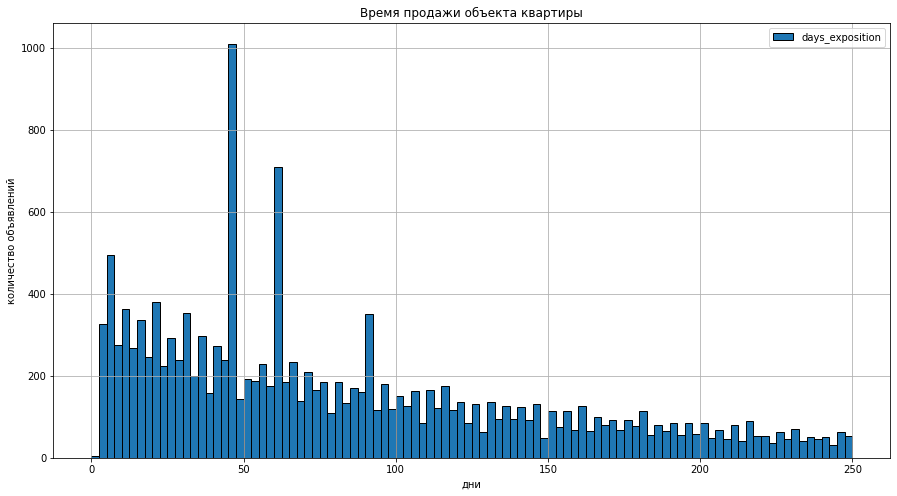

In [104]:
# Ограничим данные периодом до 250 дней
data['days_exposition'].hist(bins=100, range=(0, 250), figsize=(15, 8), ec='black', legend=True)
plt.title('Время продажи объекта квартиры')
plt.xlabel('дни')
plt.ylabel('количество объявлений')
plt.show()

Судя по графику, _чаще всего_ квартиры продаются за **45** и **60 дней**, хотя объявление могло быть просто _закрыто_ по **истечении срока публикации**. В тоже время продавец **мог забыть снять** объявление _после продажи_ квартиры, но если **актуальность** объявления _не будет потдвердждена_, оно будет автоматически **удалено**.

**Среднее и медиана срока объявления**

In [105]:
# Посмотрим новую статистику столбца days_exposition
data['days_exposition'].describe().T

count    20096.000000
mean       181.847631
std        220.479830
min          1.000000
25%         45.000000
50%         96.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64

Здесь видно, что _максимальное_ значение - **1572 дня**, _минимальное_ - **1 день**. _Среднее_ время продажи объекта недвижимости - **195 дней**, а _медианное_ - **105 дней**. При этом, _среднее_ значение **в 2 раза больше** _медианного_. Кроме того, _стандартное отклонение_ **превышает** _среднее_, что говорит о _большом_ количестве **выбросов**. Поэтому на графике выше виден **длиный "хвост"**, а _больших_ значений _достаточно много_. Построим диаграмму размаха.

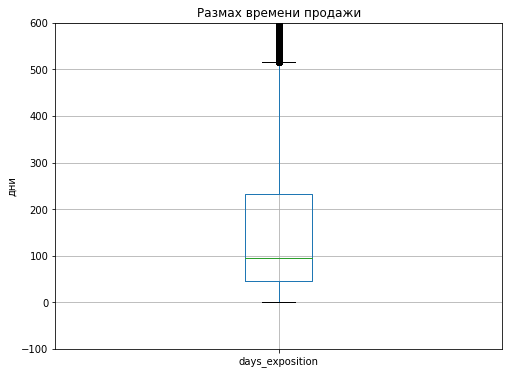

In [106]:
# Строим диаграмму размаха срока объявления
data.boxplot(column='days_exposition', figsize=(8, 6))
plt.title('Размах времени продажи')
plt.ylim(-100, 600)
plt.ylabel('дни')
plt.show()

Вычислим значение, данные выше которого являются выбросами.

In [107]:
# Рассчитаем крайнее значение
print('Выше этого -', q3 + 1.5 * iqr, '- только выбросы')

Выше этого - 515.0 - только выбросы


In [108]:
# Длина датафрейма
len(data)

23213

Уберём из датафрейма выбросы

In [109]:
# Новый датафрейм без выбросов
data_new = data.query('days_exposition < 515')

# Проверим длину нового датафрейма
len(data_new)

18453

In [110]:
# Посмотрим, сколько строк мы потеряли
print(len(data) - len(data_new))

4760


Мы потеряли 20,5% строк. Это много.

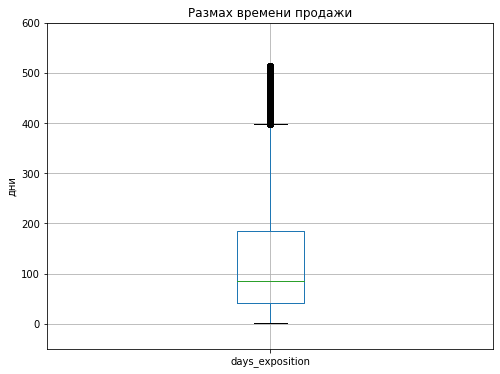

In [111]:
# Строим диаграмму размаха срока продажи без выбросов
data_new.boxplot(column='days_exposition', figsize=(8, 6))
plt.title('Размах времени продажи')
plt.ylim(-50, 600)
plt.ylabel('дни')
plt.show()

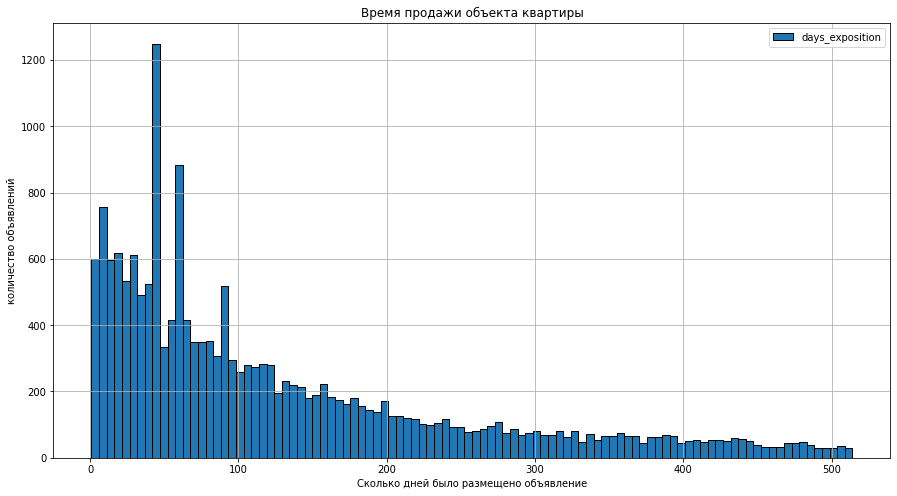

In [112]:
# Посмотрим распределение количества продаж по времени без выбросов
data_new['days_exposition'].hist(bins=100, figsize=(15, 8), ec='black', legend=True)
plt.title('Время продажи объекта квартиры')
plt.xlabel('Сколько дней было размещено объявление')
plt.ylabel('количество объявлений')
plt.show()

In [113]:
# Проверим новую статистику срока продаж
data_new['days_exposition'].describe().T

count    18453.000000
mean       129.386712
std        122.032465
min          1.000000
25%         41.000000
50%         86.000000
75%        184.000000
max        514.000000
Name: days_exposition, dtype: float64

Здесь видно, что стандартное отклонение почти равно среднему значению, а медиана меньше среднего.

**Выводы:**<br>
Мы _убрали_ из датафрейма **4760 строк**, которые содержали **выбросы** _по времени продажи квартиры_. Их оказалось много.<br>
_В среднем_ срок продажи _среднестатистичекой_ квартиры - **2-4 месяца**, или примерно **100 дней** в зависимости от парметров объекта недвижимости: площади, удалённости от центра, наличия поблизости парков и водоёмов и т. п. В таблице большое количество объектов, проданных за считанные дни после размещения объявления. Но есть объявления, которые "висят" несколько десятков месяцев.<br>
_Медианное_ значение срока продажи - **96 дней** (очищенное от выбросов - 86 дней). _Среднее_ время продажи - **182 дня** (очищенное - 129 дней).<br>
Оценка времени продажи:<br>
**быстрая продажа** - срок **до 45 дней**,<br>
**нормальный срок продажи** - период **от 45 до 230 дней**,<br>
**долгая продажа** - срок **от 230 дней** (7,5 месяцев) **до 515 дней**,<br>
**выбросы** - срок объявлений **более 515 дней**.<br>
Несмотря на то, что огромное число квартир (20,%) не были проданы, вырисовывается следующая тенденция: _количество объявлений о продаже квартир уменьшается с увеличением срока размещения объявления_, срока продажи. То есть, у "хорошей" квартиры больше шансов быть проданой в течение полугода, далее шансы на продажу падают. Поэтому количество продаж за 1-2 года в несколько раз меньше, чем за один год, а за 2-3 года их всего несколько.

#### Изучение редких и выбивающихся значений

In [114]:
# Такие значения лежат за границей в 1.5 размаха, применим функцию для их расчёта 
def q_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq
# Столбцы с выбросами
list_f = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_f:
    data[col] = q_range(data, col)

# Возвращаем в вещественный тип количество комнат
data['rooms'] = data['rooms'].fillna(0).astype(int)

# Посмотрим выбивающиеся значения
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23213.0,9.899970e+00,5.683666e+00,0.00,6.00,9.0,14.00,50.00
last_price,21143.0,4.863621e+06,2.198905e+06,12190.00,3350000.00,4450000.0,6000000.00,11768000.00
total_area,21979.0,5.462642e+01,1.929914e+01,12.00,40.00,50.5,66.00,114.60
rooms,23213.0,2.031663e+00,9.753053e-01,0.00,1.00,2.0,3.00,5.00
ceiling_height,20529.0,2.640051e+00,9.812024e-02,2.50,2.55,2.7,2.70,2.92
floors_total,23213.0,1.062637e+01,6.508252e+00,1.00,5.00,9.0,16.00,29.00
living_area,22447.0,3.174541e+01,1.403918e+01,2.00,18.20,30.0,41.50,79.42
floor,23213.0,5.858398e+00,4.834694e+00,1.00,2.00,4.0,8.00,27.00
kitchen_area,21672.0,9.351187e+00,2.798071e+00,1.30,7.00,9.0,11.00,17.70
balcony,23213.0,5.886788e-01,9.591588e-01,0.00,0.00,0.0,1.00,5.00


**Вывод:**<br>
Из датафрейма удалены значения за пределами 1.5 размаха, что привело его в более приемлемый вид.

#### Анализ факторов, влияющих на стоимость квартиры

Изучим зависимости цены от параметров объектов: общая площадь, жилая и площадь кухни, количество комнат, тип этажа, дата публикации объявлений.

In [115]:
# Вспомним названия колонок
data_new.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition', 'price_one_meter', 'expo_weekday',
       'expo_month', 'expo_year', 'floor_type', 'city_centers_km'],
      dtype='object')

Нужно создать матрицу корреляции по заданным колонкам

In [116]:
# Определим список с параметрами для проверки
cor_param = [
    'last_price',
    'total_area',
    'rooms',
    'city_centers_nearest',]
# Список с названиями параметров
cor_labels = [
    'стоимость квартиры',
    'общая площадь квартиры',
    'количество комнат',
    'расстояние\nдо центра города']

# Создаём матрицу корреляции
cor_matrix = data_new[cor_param].corr()

# Выведем на экран
display(cor_matrix)

,last_price,total_area,rooms,city_centers_nearest
last_price,1.000000,0.629072,0.344035,-0.182857
total_area,0.629072,1.000000,0.758322,-0.214680
rooms,0.344035,0.758322,1.000000,-0.175166
city_centers_nearest,-0.182857,-0.214680,-0.175166,1.000000


Нужна картинка, чтобы понять - что к чему

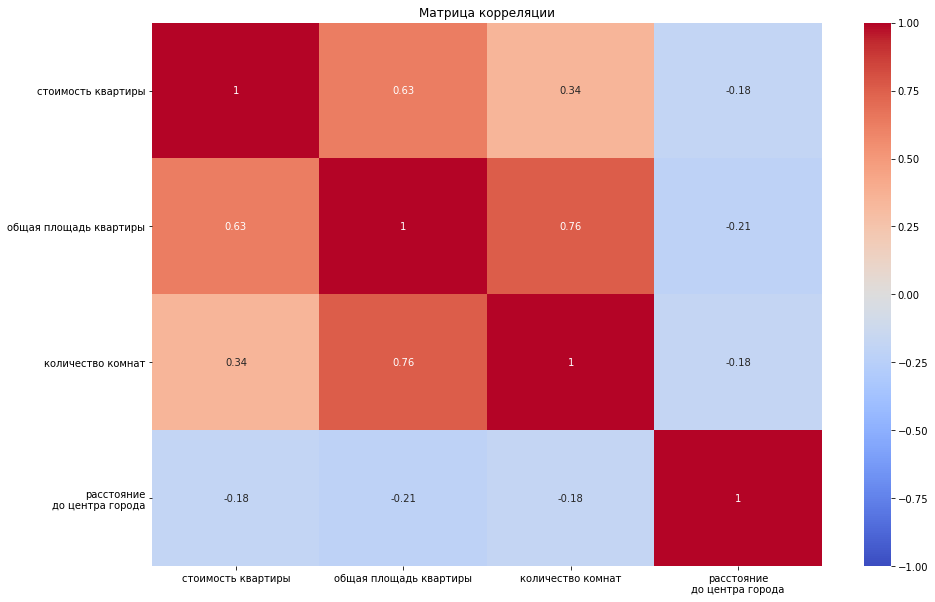

In [117]:
# Визуализируем матрицу корреляции
plt.figure(figsize = (15, 10))
sns.heatmap(cor_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            yticklabels=cor_labels,
            xticklabels=cor_labels)
plt.title('Матрица корреляции')
plt.show()

**Вывод:**<br>
Здесь видно, что _максимально положительная зависимость_ между **стоимостью квартиры** и её **площадью**, и эта связь **прямопропорциональная** - чем больше площадь квартиры, тем больше её стоимость.<br>
Также _положительная линейная связь_ присутствует между **ценой** и **количеством комнат**, но она примерно _в 2 раза меньше_ предыдущей. Однако также **прямопропорциональная** - чем  больше комнат, тем выше стоимость квартиры.<br>
Присутствует _слабая отрициательная корреляция_ между **стоимостью** и **расстоянием до центра города**, она **обратнопропорциональная** - чем ближе к центру, тем дороже квартиры.

Посмотрим на эти данные внимательнее.

Уровень корреляции 0.6926638892099387


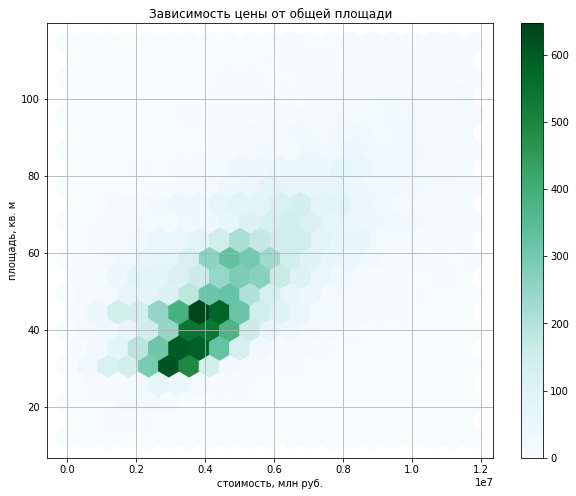

In [118]:
# Связь общей площади и стоимости квартиры
print('Уровень корреляции', data['last_price'].corr(data['total_area']))
# Посмотрим график
data.plot(x='last_price',
           y='total_area',
           kind='hexbin',
           gridsize=20,
           figsize=(10, 8),
           sharex=False,
           grid=True,
           title='Зависимость цены от общей площади',)
plt.xlabel('стоимость, млн руб.')
plt.ylabel('площадь, кв. м')
plt.show()

Связь довольно сильнаяя - 0,7 очень близко к 100%, хотя разброс приличный. С уверенностью можно сказать, что больше всего данных для квартир стоимостью до 6 млн. руб. и площадью до 60 кв. м. Прямопропорциональная зависимость - чем больше площадь квартиры, тем выше цена.

Уровень корреляции 0.5509599893709497


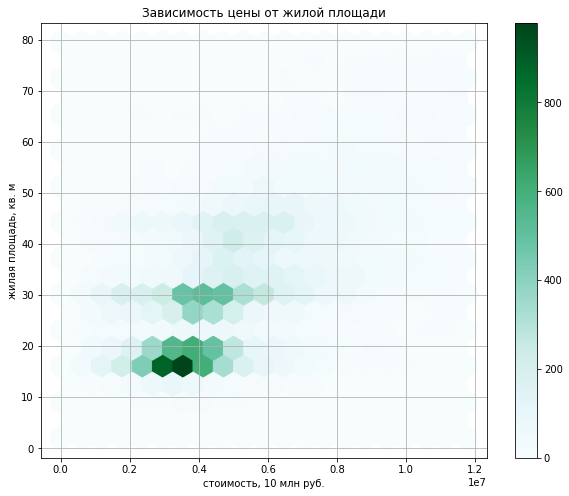

In [119]:
# Зависимость цены квартиры от жилой площади
print('Уровень корреляции', data['last_price'].corr(data['living_area']))
# Строим график
data.plot(x='last_price',
           y='living_area',
           kind='hexbin',
           gridsize=20,
           figsize=(10, 8),
           sharex=False,
           grid=True,
           title='Зависимость цены от жилой площади')
plt.xlabel('стоимость, 10 млн руб.')
plt.ylabel('жилая площадь, кв. м')
plt.show()

Здесь картина близкая к зависимости от общей площади, но немного уступает в значимости. Из графика видно, что больше всего данных для квартир стоимостью до 40 млн. руб. и жилой площадью до 25 кв. м. Прямопропорциональная зависимость подтверждена.

Уровень корреляции 0.4589562390514567


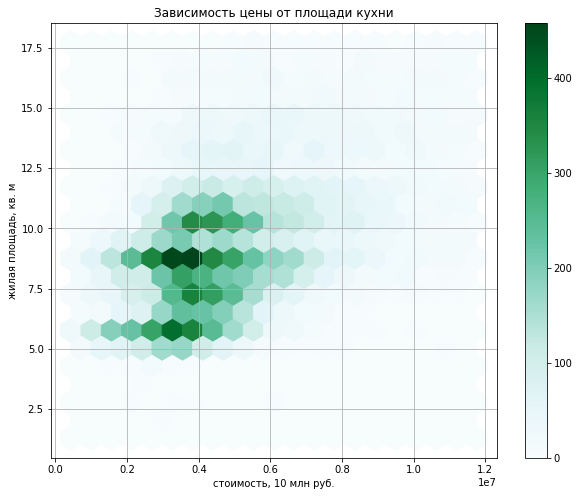

In [120]:
# Корреляция стоимости квартиры с площадью кухни
print('Уровень корреляции', data['last_price'].corr(data['kitchen_area']))
# Строим график
data.plot(x='last_price',
           y='kitchen_area',
           kind='hexbin',
           gridsize=20,
           figsize=(10, 8),
           sharex=False,
           grid=True,
           title='Зависимость цены от площади кухни')
plt.xlabel('стоимость, 10 млн руб.')
plt.ylabel('жилая площадь, кв. м')
plt.show()

Из графика видно, что зависимость присутствует, но не такая явная как в случаях с жилой и общей площадью. Больше всего данных для квартир стоимостью от 20 до 50 млн руб. и кухней площадью до 12 кв. м. Прямопропорциональная зависимость подтверждена: чем больше площадь кухне, тем дороже квартира.

Уровень корреляции 0.44065798410413737


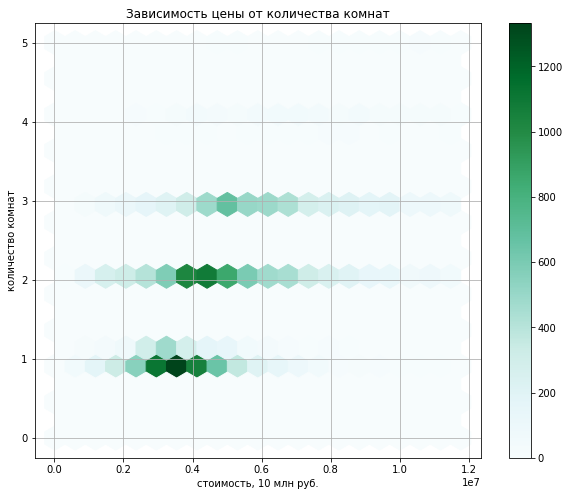

In [121]:
# Найдём зависимость стоимости квартиры от количества комнат
print('Уровень корреляции', data['last_price'].corr(data['rooms']))
# Смотрим график
data.plot(x='last_price',
           y='rooms',
           kind='hexbin',
           gridsize=20,
           figsize=(10, 8),
           sharex=False,
           grid=True,
           title='Зависимость цены от количества комнат')
plt.xlabel('стоимость, 10 млн руб.')
plt.ylabel('количество комнат')
plt.show()

Можно сказать, что _количество комнат_ влияет на _цену квартиры_ почти, **как площадь кухни**, даже **больше**. Из графика видно, что _больше всего_ продавались квартиры _стоимостью_ **от 25 до 50 млн руб.** и _количеством комнат_ **от 1 до 3**. Однако здесь не видно квартир больше 3-х комнат, надо построить другой график.

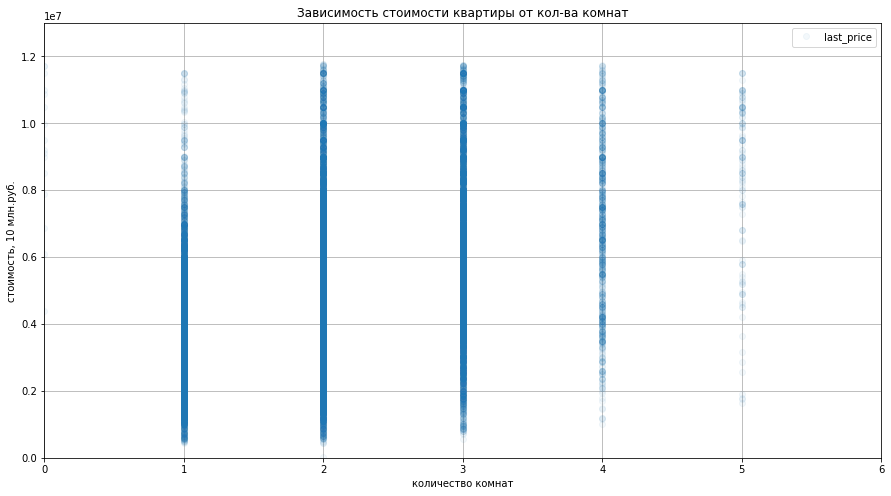

In [122]:
data.plot(x = 'rooms', y = 'last_price', style='o', grid=True, figsize=(15, 8), alpha=0.05)
plt.title('Зависимость стоимости квартиры от кол-ва комнат')
plt.xlabel('количество комнат')
plt.ylabel('стоимость, 10 млн.руб.')
plt.ylim(0, 13000000) # уберём выбросы и аномалии
plt.xlim(0, 6)
plt.show()

Нужно отметить, что _стоимость квартир_ также растёт с увеличением _количества комнат_ **до 3-х**, но в диапазоне **от 3-х до 4-х** цена примерно _одинаковая_. А вот для **5-комнатных квартир** цена уже _снижается_, видимо из-за того, что в старом фонде есть такие объекты, но с маленькой площадью.

**Корреляция стоимости квартир и времени публикации объявления**

Зависимость стоимости квартир от дня недели, когда было опубликовано объявление.

In [123]:
data['last_price'].head()

0           NaN
1     3350000.0
2     5196000.0
3           NaN
4    10000000.0
Name: last_price, dtype: float64

Уровень корреляции -0.01455207547092925


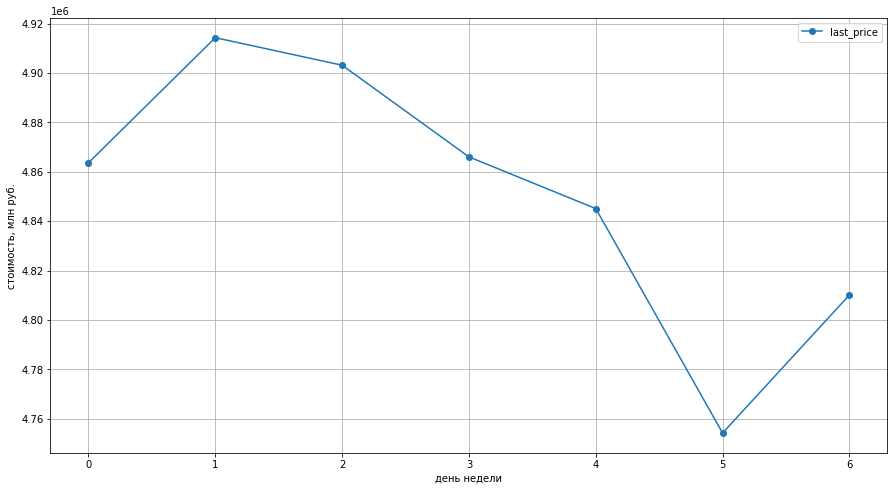

In [124]:
# корреляция дня недели и цены
print('Уровень корреляции', data['last_price'].corr(data['expo_weekday']))
# cтроим график зависимости цены от дня размещения
(
    data.pivot_table(index='expo_weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(15, 8))
)
title=('Зависимость цены от дня недели публикации')
plt.xlabel('день недели')
plt.ylabel('стоимость, млн руб.')
plt.show()

Коэффициент корреляции близок к нулю, но график показывает, что цена квартир опубликованых во вторник и среду выше, а самая низкая у размещённых в субботу. Посмотрим количество объявлений по дням недели.

In [125]:
# Посмотрим описательную статистику данных по дню публикации объявления
data['expo_weekday'].describe().T

count    23213.000000
mean         2.565674
std          1.788719
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: expo_weekday, dtype: float64

In [126]:
# Посмотрим по каждому дню недели количество объявлений
data['expo_weekday'].value_counts().sort_values()

6    1656
5    1897
0    3549
2    3893
4    3904
1    4104
3    4210
Name: expo_weekday, dtype: int64

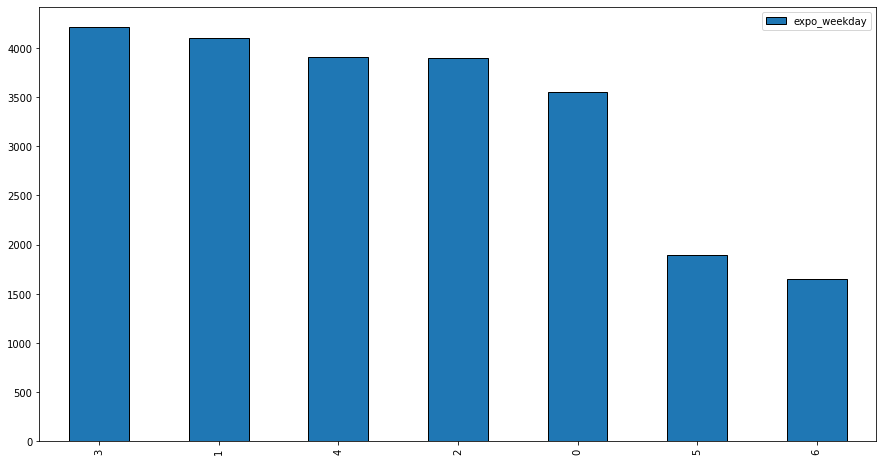

In [127]:
# Построим другой график
data['expo_weekday'].value_counts().plot.bar(figsize=(15, 8), ec='black', legend=True)
plt.show()

На этом графике видно, что чаще всего объявления публиковали в будние дни в четверг и вторник. На втором месте - среда и пятница. Реже всего размещали объявления в субботу и воскресенье.

Далее месяц размещения объявления

In [128]:
# Смотрим описание
data['expo_month'].describe().T

count    23213.000000
mean         6.393659
std          3.492334
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: expo_month, dtype: float64

In [129]:
# Количество объявлений по каждому месяцу
data['expo_month'].value_counts().sort_values()

5     1249
1     1476
12    1612
7     1664
8     1704
6     1727
9     1933
10    2080
11    2309
4     2329
3     2537
2     2593
Name: expo_month, dtype: int64

Уровень корреляции 0.007384658435594405


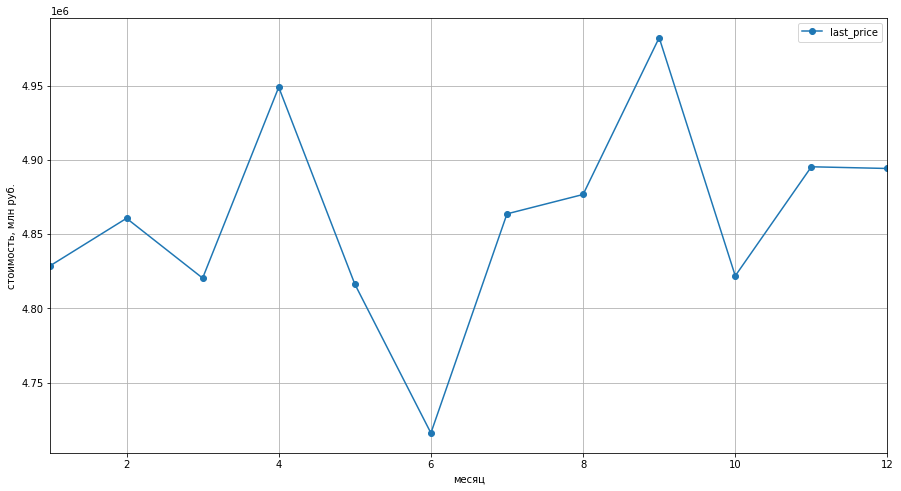

In [130]:
# месяц
print('Уровень корреляции', data['last_price'].corr(data['expo_month']))
# cтроим график
# Зависимость от месяца размещения
(
    data.pivot_table(index='expo_month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(15, 8))
)
title=('Зависимость цены от месяца публикации')
plt.xlabel('месяц')
plt.ylabel('стоимость, млн руб.')
plt.show()

Самая высокая стоимость квартир в сентябре, на втором месте - апрель. Самая низкая - в июне. Цена объектов опубликованных в январе, феврале, марте мае, июле, августе, октябре, ноябре и декабре держится в коридоре 4,82-4,89, поднимаясь к декабрю. Провалы в январе, марте и мае связаны с прязниками, в июне - с началом отпускного сезона, в октябре - скорее всего, с началом учебного года.

Строим следующий график

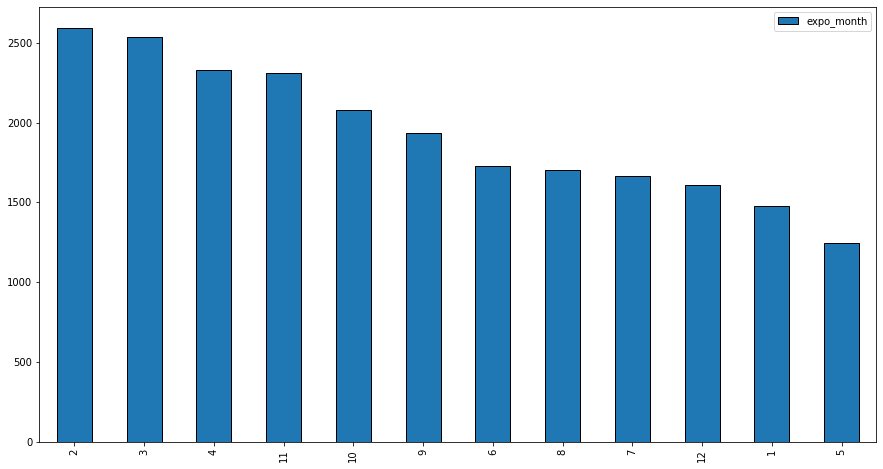

In [131]:
# количество объявлений по месяцам
data['expo_month'].value_counts().plot.bar(figsize=(15, 8), ec='black', legend=True)
plt.show()

Чаще всего объявления размещали в феврале и марте. На втором месте - апрель и ноябрь, потом октябрь и сентябрь. Реже - в июне, июле и августе. Но реже всего публиковали объявления о продаже квартиры в декабре, январе и мае. наверное из-за праздников.

Год размещения объявлений

In [132]:
# Количество по каждому году
data['expo_year'].value_counts().sort_values()

2014     137
2015    1175
2016    2740
2019    2825
2017    8007
2018    8329
Name: expo_year, dtype: int64

In [133]:
# Смотрим статистику колонки
data['expo_year'].describe().T

count    23213.000000
mean      2017.365226
std          1.042059
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: expo_year, dtype: float64

Уровень корреляции 0.00015288367198997035


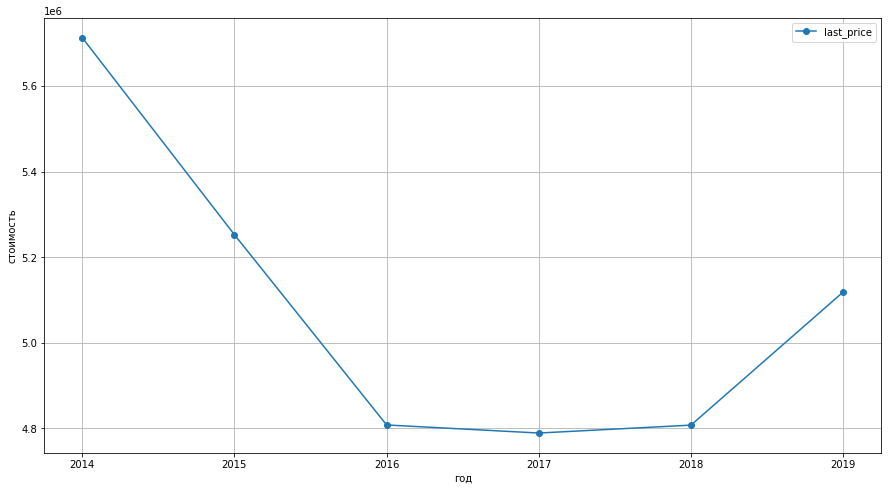

In [134]:
#год
print('Уровень корреляции', data['last_price'].corr(data['expo_year']))
# cтроим график зависимости цены от года размещения
(
    data.pivot_table(index='expo_year', values='last_price')
    .plot(grid=True, style='o-', figsize=(15, 8))
)
title=('Зависимость цены от года публикации')
plt.xlabel('год')
plt.ylabel('стоимость')
plt.show()

И что мы видим? Самые высокие цены были в 2014 году, затем они стали снижаться вплоть до 2016-го. Скорее всего, это стало последствием санкционного кризиса. В период 2016-2018 гг. средние цены на квартиры держались одного уровня. Они начали расти к 2019 году.

Посмотрим второй график

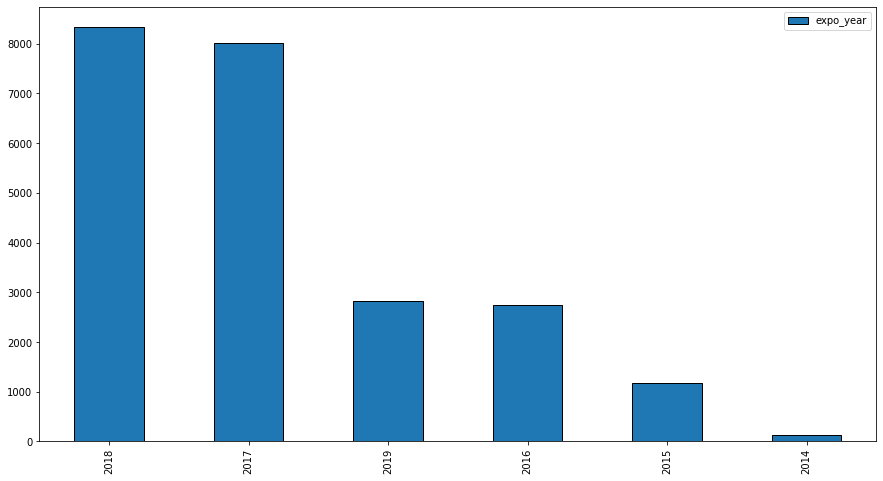

In [135]:
# Число объявлений по годам
data['expo_year'].value_counts().plot.bar(figsize=(15, 8), ec='black', legend=True)
plt.show()

Как интересно. Больше всего объявлений о продаже в 2017-2018 годах, при этом разница совсем небольшая. А вот со вторым местом, на котором стоит 2019 год, разница почти в 3 раза по количеству публикаций. Кстати 2016-й год недалеко ушёл от 2019-го. В 2015 году размещений было в 2 раза меньше, чем в последующем. А вот в 2014-м вообще ничтожное количество.

**Выводы:**<br>
_Коэффициенты корреляции_ **близки к нулю**, прямая _связь_ стоимости квартир с датой публикации объявления (день недели, месяц, год) **отсутствует**.

**Зависимость цены от типа этажа**

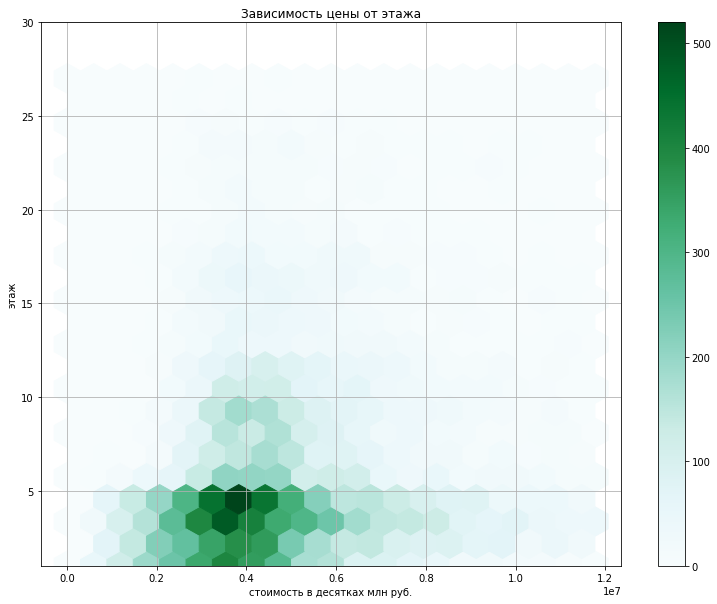

In [136]:
# Сначала посмотрим зависимость цены от этажа
data.plot(x='last_price',
           y='floor',
           kind='hexbin',
           gridsize=20,
           figsize=(13, 10),
           sharex=False,
           grid=True,
           title='Зависимость цены от этажа')
plt.xlabel('стоимость в десятках млн руб.')
plt.ylim(1, 30)
plt.ylabel('этаж')
plt.show()

Здесь мы видим подтверждение вывода о том, что основная масса квратир в продаже в 5- и 9-этажных домах. Далее посмотрим связь цены с типом этажа.

,mean,count,median
floor_type,,,
другой,5.053320e+06,15475,4600000.0
первый,4.165459e+06,2737,3850000.0
последний,4.514005e+06,2931,4100000.0


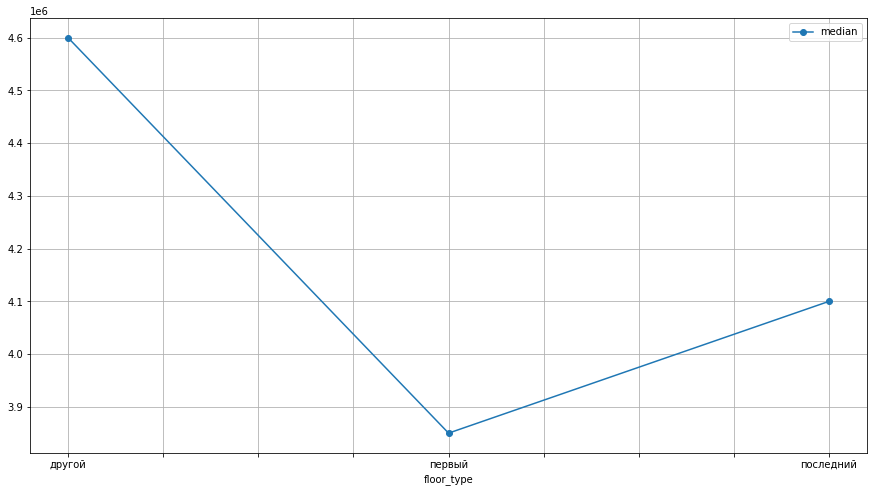

In [137]:
# Создадим сводную таблицу
pivot_table_floor_type = data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
# Называем колонки
pivot_table_floor_type.columns = ['mean', 'count', 'median']
# ищем зависимость
pivot_table_floor_type.plot(y = 'median',
                            legend=True,
                            grid=True,
                            style='o-',
                            figsize=(15, 8))
# Смотрим график изменения цены в зависимости от типа этажа
pivot_table_floor_type

**Вывод:**
Здесь видно, что _медианное_ значение цены для квартир _на первом этаже_ **минимальное**, как и для _последнего этажа_. _Максимальной медиана_ стоимости квартир наблюдается *на промежуточных между первым и последним этажами*.

**Промежуточные итоги:**<br>
_Стоимость_ объекта недвижимости **прямопропорционально зависит** от _общей площади_ и _этажа_ расположения квартиры. Чем больше площадь, тем выше стоимость. _На первом и последнем этажах_ квартиры **дешевле**, чем _на промежуточных_. **Дата публикации** объявления _на стоимость_ **не влияет**.

#### Найдём среднюю цену квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [138]:
# Найдём 10 населенных пунктов с наибольшим числом объявлений
top_10 = data.pivot_table(index='locality_name', values='first_day_exposition', aggfunc='count').sort_values(by='first_day_exposition', ascending=False).head(10)
top_10.columns=['кол-во']
top_10.reset_index()

,locality_name,кол-во
0,санкт-петербург,15472
1,мурино,559
2,кудрово,448
3,шушары,435
4,всеволожск,391
5,пушкин,366
6,колпино,337
7,парголово,322
8,гатчина,307
9,выборг,235


In [139]:
# Найдём среднюю цену 1 кв. м в топ-10 городов по числу объявлений
city_10 = data['locality_name'].value_counts().head(10)
city_sort_price = data.query('locality_name in (@city_10.index)').pivot_table(values='price_one_meter', index='locality_name')
city_sort_price = city_sort_price.astype(int)
city_sort_price.sort_values('price_one_meter', ascending=False)

,price_one_meter
locality_name,
санкт-петербург,114811
пушкин,103147
кудрово,95083
парголово,90320
мурино,85469
шушары,78277
колпино,75443
гатчина,68746
всеволожск,68683


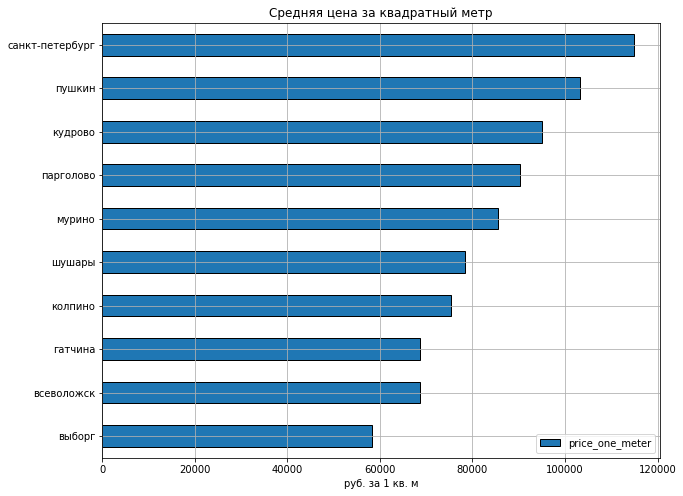

In [140]:
# Построим график средней цены 1 кв. м в первых 10 населённых пунктах
city_sort_price.sort_values(by='price_one_meter').plot(kind='barh', legend=True, grid=True, ec='black', figsize=(10, 8))

plt.title('Средняя цена за квадратный метр')
plt.xlabel('руб. за 1 кв. м')
plt.ylabel('')
plt.show()

**Вывод:**<br>
Из графика видно, что _наибольшая_ средняя цена за 1 кв. м  у объектов **в Санкт-Петербурге** - **114 811 руб.**, что логично. _На втором месте_ город **Пушкин** - **103 147 руб.**. Это тоже логично, учитывая историческое значение города, большое количество парков и близость к городу. Далее в списке населённые пункты, которые фактически входят в черту города и непосредственно к нему примыкают.  _Самые дешёвые_ квадратные метры _в самых удалённых_ от Санкт-Петербурга городах: в **Гатчине** - **68 746 руб.**, **Всеволожске** - **68 683 руб.** и **Выборге** - **58 238 руб.**, что тоже логично, если посмотрить на _расстояние до Питера_.

#### Найдём среднюю стоимость объектов в Санкт-Петербурге на разном расстоянии от центра

In [141]:
# Выбираем только Санкт-Петербург
df_spb = data.query('locality_name == "санкт-петербург"')
df_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_meter,expo_weekday,expo_month,expo_year,floor_type,city_centers_km
0,20,NaN,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,NaN,0,санкт-петербург,18863.0,16028.0,True,482.0,True,755.0,NaN,120370.37,3,3,2019,другой,16.0
2,10,5196000.0,56.0,2015-08-20,2,2.7,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,True,90.0,True,574.0,NaN,92785.71,3,8,2015,другой,14.0
3,0,NaN,NaN,2015-07-24,3,2.7,14,45.0,9,False,False,False,9.5,0,санкт-петербург,28098.0,6800.0,True,84.0,True,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,NaN,14,32.0,13,False,False,False,NaN,0,санкт-петербург,31856.0,8098.0,True,112.0,True,48.0,121.0,100000.00,1,6,2018,другой,8.0
7,5,7915000.0,71.6,2019-04-18,2,2.7,24,30.5,22,False,False,False,NaN,2,санкт-петербург,23982.0,11634.0,False,NaN,False,NaN,NaN,110544.69,3,4,2019,другой,12.0


In [142]:
# Посмотрим количество объявлений, в которых указано расстояние до центра города
len(df_spb)

15472

Всего 15 473 объявления о квартирах в Санкт-Петербурге. Далее определим центр с помощью цены квадратного метра. Построим график. Та точка, после которой пойдет явный спад в стоимости и будем считать за границы центра города.

In [143]:
# Посмотрим описание столбца расстояния до центра города в км
df_spb['city_centers_km'].describe().T

count    15472.000000
mean        11.560367
std          4.838305
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: city_centers_km, dtype: float64

Диаграмма размаха расстояния до центра города


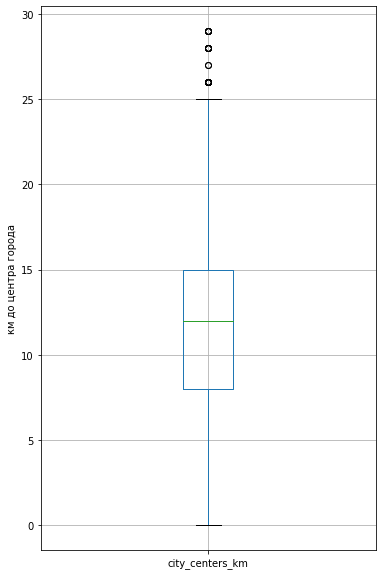

In [144]:
print('Диаграмма размаха расстояния до центра города')
df_spb.boxplot('city_centers_km', figsize=(6, 10))
plt.ylabel('км до центра города')
plt.show()

Здесь видим выбросы после 25 км.Избавимся от них.

Диаграмма размаха расстояния до центра города


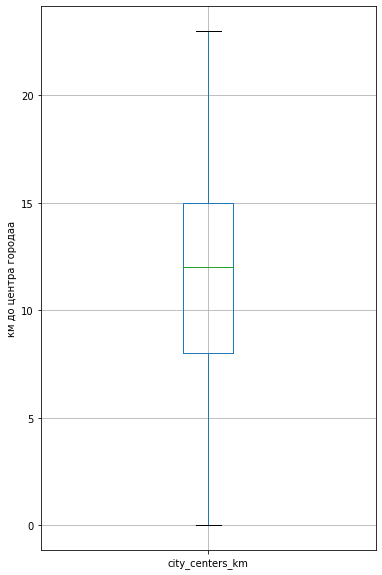

In [145]:
df_spb = df_spb.loc[data['city_centers_km'] < 24]
print('Диаграмма размаха расстояния до центра города')
df_spb.boxplot('city_centers_km', figsize=(6, 10))
plt.ylabel('км до центра городаа')
plt.show()

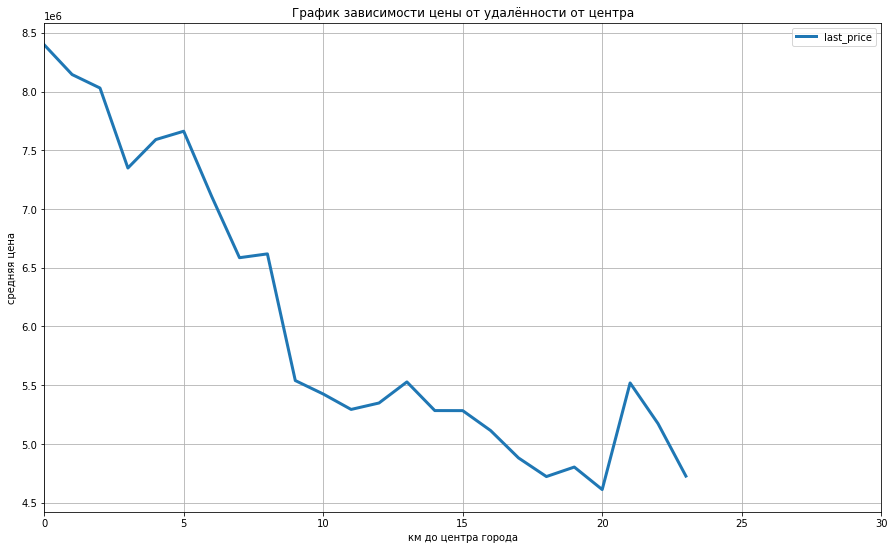

In [146]:
# Построим графики зависимости цены от расстояния до центра города, а так же определим границу центральной зоны
df_spb.pivot_table(index='city_centers_km', values='last_price', aggfunc='mean') \
   .plot(
    figsize=(15, 9),
    grid=True,
    linewidth=3,
    title='График зависимости цены от удалённости от центра')
plt.xlim(0, 30)
plt.xlabel('км до центра города')
plt.ylabel('средняя цена')
plt.show()

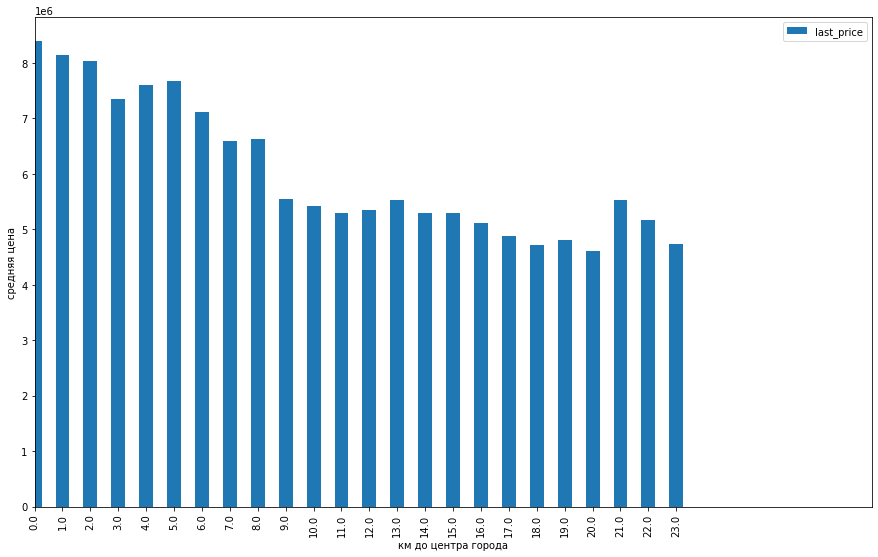

In [147]:
# Построим подробный график по каждому километру и определим границу центральной зоны
df_spb.pivot_table(index='city_centers_km', values='last_price', aggfunc='mean') \
   .plot(kind='bar', figsize=(15, 9))
plt.xlim(0, 30)
plt.xlabel('км до центра города')
plt.ylabel('средняя цена')
plt.show()

На графиках видно падение цены, которое сильно меняется при достижении значения в 3 км, после чего начинается рост стоимости квадратного метра до отметки 6-7 км. Значит центральным районом можно считать все объекты на расстоянии не более чем 7 км до центра города. Но есть и пик на 27 км, вероятно новостройки или хорошее место.

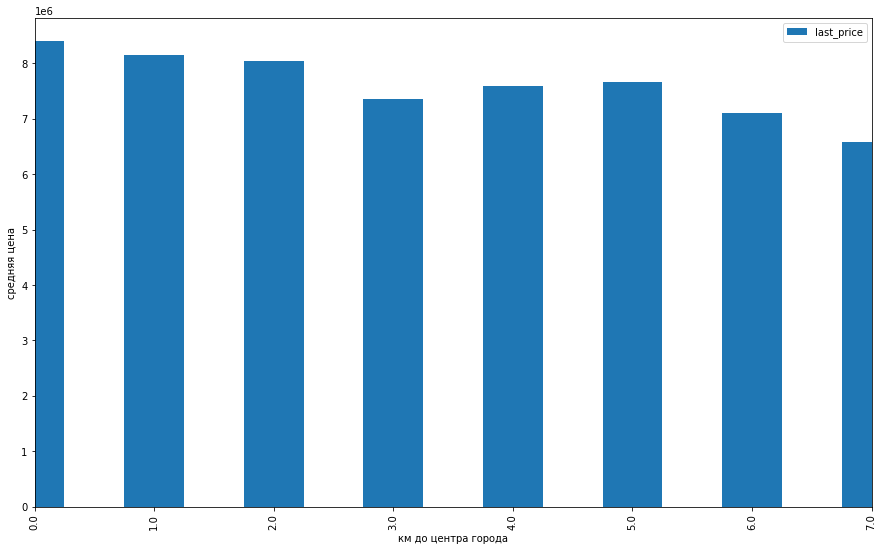

In [148]:
# В новом графике ограничим показатели границами центральной зоны
df_spb.pivot_table(index='city_centers_km', values='last_price', aggfunc='mean') \
   .plot(kind='bar', figsize=(15, 9))
plt.xlim(0, 7)
plt.xlabel('км до центра города')
plt.ylabel('средняя цена')
plt.show()

**Выводы:**<br>
Можно сказать, что стоимость квартир в Санкт-Петербурге мало зависит от расстояния непосредственно до центра города. Скорее всего, цена менятся как и во всех других местах в зависимости от общей площади и количесва комнат, этажа и площади кухни.<br>
В то же время можно заметить, что после отметки 8 км от центра форма графика становится плавно линейной с постепенным снижением стоимости. Максимальная цена в самом центре города (до 1 км). На отметке 27 км есть пик роста цен, который, с большой долей вероятности, может означать квартиры в Пушкине (он как раз на расстоянии 27 км от центра города).

## Общий вывод

Проведён анализ объявлений о продаже квартир в Санкт-Петербурге и его пригородах. Во время подготовки было выявлено большое количество пропусков в данных, которые могут влиять не только на анализ, но и на цены на рынке недвижимости в этом регионе.<br>
В частности не хватает много картографической информации: ближайшие парки, водоёмы, аэропорты (эти данные получены автоматически, поэтому пропуски оставлены без изменений).<br>
Некритичные пропуски были удалены, а также исправлены неявные дубликаты и аномалии данных. Некоторые пропуски были восполнены средним или медианным значением, либо заменены нулями из-за отсутствия необходимых параметров.<br>
В связи с этим нужно обратить внимание на подготовку и сбор данных, на контроль за заполняемостью ячеек пользователями, а также на корректность выгрузки информации. При этом очень мало ошибок, вызванных человеческим фактором: опечатки, неверные написания, отписки — это облегчило предобработку материала.<br>
На следующем этапе были изучены параметры объектов, необходимые для дальнейшего анализа: общая площадь и жилая площадь, площадь кухни, количество комнат, высота потолков, этаж квартиры и его тип, общее количество этажей в доме, расстояние до центра города, аэропорта, ближайшего парка и водоёма, стоимость квартиры.<br>
Большая часть объявлений по общей площади, жилой и кухни распределены по типовым домам советской застройки, также, как и по количеству комнат: 1, 2, реже 3, совсем редко больше трёх комнат. Также выявлено, что больше всего объявлений о продаже квартир на 2-4 этажах. Здесь можно предположить влияние застройки города и наличие в таблице объявлений об объектах в пригороде, посёлках и деревнях.<br>
В этот момент был получен «паспорт» типичного объекта недвижимости, выставленного на подажу — это 1- 2-комнатная квартира в 5- или 9-этажном доме не на первом и не на последнем этажах, общей площадью 45-60 кв. м, площадь кухни около 6-8 кв. м, высота потолков 2,5-2,7 м, расположенна от центра города на расстоянии 11-16 км, от аэропорта — 15-25 км, а от ближайшего парка — около 500 метров, как и от ближайшего водоёма. Стоимость такой типичной квартиры 3-4 млн руб.<br>
Также были выполнены расчёты средней стоимости одного квадратного метра, выявлена динамика цен на квартиры с каждым километром удаления от центра города, изучены сроки продажи объектов после размещения объявления и определены влияющие на это факторы. Для этого изучалась статистика продаж и зависимости.<br>
Для проведения анализа были добавлены новые колонки: цена одного квадратного метра, день, месяц и год размещения обьявления, расстояние в км от центра города, тип этажа расположения квартиры.<br>
Было обнаружено, что самое частое время продажи квартиры от 45 до 230 дней, обычно — за 3 месяца. Стало понятно, что срок объявления полтора года и выше является «долгой продажей», а «быстрой» — до полтора месяцев.<br>
Каждый километр удаления от центра Санкт-Петербурга влияет на стоимость квартиры. Например, цена объекта при движени с 30 до 8 км к центру растёт достаточно медленно. Однако после отметки в 7 км квартиры начинают сремительно дорожать. Самые дорогие объекты находятся в пределах 1 км от центра. При этом выделяется стоимостью квартир город Пушкин, который сам является исторческим местом и близок к парковому музею Павловску.<br>
Также была определена корреляция цены с каждым параметром квартиры и построены графики для визуализации. Тогда стало понятно, что основная масса объявлений говорит о продаже недвижимости в самом Санкт-Петербурге. Ожидаемо, что в городе самая высокая средняя цена квадратного метра (исследовалось в сравнении с первыми 10 населёнными пунктми по количеству объявлений). Самая низкая из первой десятки средняя стоимость квадратного метра в Выборге.<br>
Несмотря на это средняя цена квадратного метра в городе почти такая же как в его окрестностях, что стало результатом активного строительства за пределами Петербурга. Однако в высотных новостройках по периметру Санкт-Петребурга меньше всего объявлений о продаже квартиры. Вероятно, со временем, в будущем, количество предложений в таких домах, будет увеличиваться вместе с ценой, как и количество самих домов.<br>
Отличная ситуация с ценами на жильё в центре города в невысоких домах старой застройки. Там практически не ведётся нового строительства. Однако, довольно активно проходят капитальный ремонт и реставрация. Это значит, что цены в центре также будут расти, хотя предложение расти врядли будет.<br>
Наибольшее влияние на стоимость квартиры оказывает её площадь, включая параметры кухни и жилую площадь — чем больше площадь (всех параметров вместе и по отдельности), тем выше цена. На втором месте количество комнат, от которого напрямую зависит стоимость. На третьем месте — расстояние до центра города: чем ближе к центру (в ходе исследования выявили, что зона центра радиусом 7 км), тем дороже квартира.<br>
Остальные параметры, как то этаж и высотность дома, день и месяц размещения объявления, близость парков и водоёмов практически не влияют на цену.<br>
Однако, исследования связи финансов с датой публикации объяления показали, что самые высокие цены были установлены во вторник в сентябре 2014 года.<br>
Вообще квартиры в объявлениях, опубликованых во вторник и среду, самые дорогие, а самая низкая средняя цена у размещённых в субботу.<br>
Апрель на втором месте после сентября по стоимости недвижимости, а самая низкая цена в июньских объявлениях, скорее всего из-за отпусков. Напомним, что средняя цена объектов размещённых в январе, феврале, марте мае, июле, августе, октябре, ноябре и декабре держится в коридоре 4,82-4,89, поднимаясь к декабрю. Провалы в январе, марте и мае связаны с праздниками, в июне — с началом отпускного сезона, в октябре — скорее всего, с началом учебного года.<br>
Высокие цены в 2014 году связаны с последствием санкционного кризиса, как и дальнейшее их снижение до 2016 года. Период 2016-2018 гг. стал спокойным для средних цен на квартиры, они держались примерно на одном уровне, начав расти к 2019 году.<br>
Кроме того это исследование показало, что чаще всего объявления публиковали в будние дни — в четверг, на втором месте — вторник, на третьем и чевёртом — среда и пятница. Реже всего размещали объявления в субботу и воскресенье.<br>
Что касается месяца публикации, то больше всего объявлений о продаже квартиры размещалось в феврале и марте, а реже всего — в декабре, январе и мае, наверное, из-за праздников.<br>
По годам 2017-2018 годы стали самыми богатыми на публикации, при этом разница совсем небольшая. Кстати, минмальное количество объявлений в 2014 году, как их увеличение в последующие годы, скорее всего, связано с началом активной работы сервиса объявлений о недвижимости.<br>